In [2]:
import pandas as pd

In [3]:
df_bagerhat = pd.read_csv('Bagerhat_historical_weather_1980_2024.csv')

# For Humidex (Humidity Index)
here we are taking temperature and humidity so that data doesn't leak while training models

In [4]:
df_bagerhat.info()
df_bagerhat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16437 entries, 0 to 16436
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       16437 non-null  object 
 1   day                            16437 non-null  int64  
 2   month                          16437 non-null  int64  
 3   year                           16437 non-null  int64  
 4   temperature(degree C)          10478 non-null  float64
 5   feels_like(degree C)           10478 non-null  float64
 6   max_temperature(degree C)      14991 non-null  float64
 7   minimum_temperature(degree C)  14991 non-null  float64
 8   humidity                       10478 non-null  float64
 9   precipitation                  5479 non-null   float64
 10  windspeed                      11924 non-null  float64
 11  atmospheric_pressure           7115 non-null   float64
 12  UV                             4038 non-null  

,district,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
0,Bagerhat,1,1,1980,21.7,21.7,26.1,18.1,77.1,NaN,3.6,1013.0,NaN,NaN,17.1
1,Bagerhat,2,1,1980,20.8,20.8,25.1,15.1,64.4,NaN,5.4,1012.9,NaN,NaN,13.3
2,Bagerhat,3,1,1980,23.0,23.0,26.1,16.6,60.2,NaN,16.6,1013.0,NaN,NaN,14.1
3,Bagerhat,4,1,1980,22.3,22.3,26.1,16.1,70.4,NaN,18.4,1014.2,NaN,NaN,16.3
4,Bagerhat,5,1,1980,22.1,22.1,26.1,18.1,67.8,NaN,11.2,1015.1,NaN,NaN,15.5


In [5]:
df_bagerhat.describe()

,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
count,16437.000000,16437.000000,16437.000000,10478.000000,10478.000000,14991.000000,14991.000000,10478.000000,5479.000000,11924.000000,7115.000000,4038.000000,4038.000000,10478.000000
mean,15.730243,6.522723,2002.000000,25.894894,29.129691,20.938530,15.808498,81.597137,4.723946,8.613334,1008.247646,7.029965,191.903096,22.121989
std,8.800616,3.448865,12.988187,4.332450,7.149669,14.130182,11.276950,8.622714,10.107510,7.681203,5.647070,1.639506,54.105023,4.895923
min,1.000000,1.000000,1980.000000,3.100000,-0.300000,0.000000,-19.900000,38.900000,0.000000,0.000000,982.700000,0.000000,0.000000,3.100000
25%,8.000000,4.000000,1991.000000,22.800000,23.000000,0.000000,0.000000,76.500000,0.000000,0.000000,1003.800000,6.000000,164.900000,18.100000
50%,16.000000,7.000000,2002.000000,27.400000,30.000000,28.100000,19.700000,82.400000,0.400000,9.000000,1008.600000,7.000000,195.850000,24.100000
75%,23.000000,10.000000,2013.000000,29.100000,35.100000,31.800000,26.100000,87.400000,5.600000,13.000000,1013.000000,8.000000,227.300000,26.200000
max,31.000000,12.000000,2024.000000,38.100000,58.800000,41.000000,38.100000,100.000000,192.800000,103.700000,1088.100000,10.000000,308.700000,31.100000


# find the number of datasets for temperature and humidity in the dataset

In [6]:
# find the number of temperature and humidity in the dataset
df_bagerhat_temperature= df_bagerhat['temperature(degree C)'].count()
print (f"temperature(degree C) has : {df_bagerhat_temperature}")

df_bagerhat_dewpoint= df_bagerhat['humidity'].count()
print (f"dew point has : {df_bagerhat_dewpoint}")

temperature(degree C) has : 10478
dew point has : 10478


# Features for Humidity

In [7]:
desired_colmn = ['day', 'month', 'year', 'temperature(degree C)', 'dew_point']
HI_df_bagerhat = df_bagerhat[desired_colmn]

HI_df_bagerhat.head()

,day,month,year,temperature(degree C),dew_point
0,1,1,1980,21.7,17.1
1,2,1,1980,20.8,13.3
2,3,1,1980,23.0,14.1
3,4,1,1980,22.3,16.3
4,5,1,1980,22.1,15.5


In [8]:
with_no_null_HI = HI_df_bagerhat.dropna()
print(f"After removing missing values from bagerhat, dataset contains {with_no_null_HI.shape[0]} rows and {with_no_null_HI.shape[1]} columns out of {df_bagerhat.shape[0]} rows.")
with_no_null_HI.head()

After removing missing values from bagerhat, dataset contains 10478 rows and 5 columns out of 16437 rows.


,day,month,year,temperature(degree C),dew_point
0,1,1,1980,21.7,17.1
1,2,1,1980,20.8,13.3
2,3,1,1980,23.0,14.1
3,4,1,1980,22.3,16.3
4,5,1,1980,22.1,15.5


# count zeroes and drop it 

In [9]:

zeros_per_col = (with_no_null_HI == 0).sum()
zeros_df = zeros_per_col.to_frame(name='zero_count')
zeros_df['zero_percentage'] = (zeros_df['zero_count'] / len(with_no_null_HI) * 100).round(2)
zeros_df = zeros_df[zeros_df['zero_count'] > 0].sort_values('zero_count', ascending=False)

print("Number of zeros per column (only columns with >0 zeros shown):")
display(zeros_df)


Number of zeros per column (only columns with >0 zeros shown):


,zero_count,zero_percentage


# time series analysis

Date range: 1980-01-01 to 2024-12-31


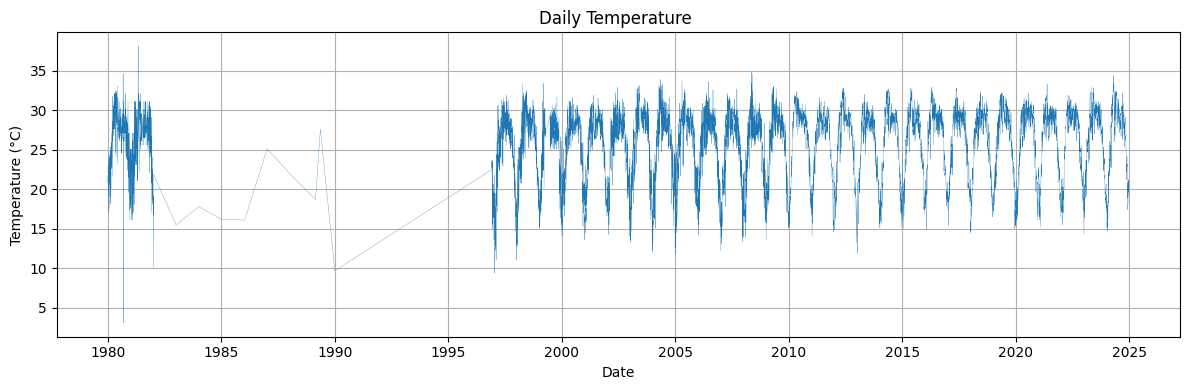

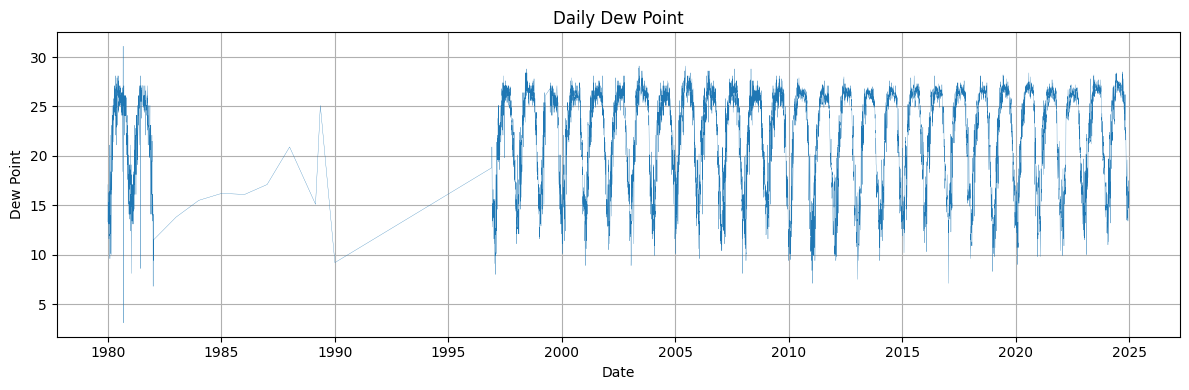

In [40]:
import matplotlib.pyplot as plt

# ensure a datetime column exists
if 'date' not in with_no_null_HI.columns:
    with_no_null_HI['date'] = pd.to_datetime(with_no_null_HI[['year', 'month', 'day']])

# show date range
min_date = with_no_null_HI['date'].min()
max_date = with_no_null_HI['date'].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# plot daily temperature time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['temperature(degree C)'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature ')
plt.grid(True)
plt.tight_layout()
plt.show()

# plot dew point time series
plt.figure(figsize=(12, 4))
plt.plot(with_no_null_HI['date'], with_no_null_HI['dew_point'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('Dew Point')
plt.title('Daily Dew Point')
plt.grid(True)
plt.tight_layout()
plt.show()



# Random Forest for temperature and dewpoint

In [11]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Expect a DataFrame named `with_no_nullData`
df = with_no_null_HI.copy()
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'


Features = ['day', 'month', 'year']

TARGET = ['temperature(degree C)', 'dew_point']
DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

rf_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
rf_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
rf_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
rf_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== RandomForest Regression Metrics (Test) ====")
print(f"R^2  : {rf_r2:.4f}")
print(f"MSE  : {rf_mse:.4f}")
print(f"RMSE : {rf_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {rf_acc_05*100:.2f}%")
print(f"  ±1.0°C : {rf_acc_10*100:.2f}%")
print(f"  ±2.0°C : {rf_acc_20*100:.2f}%")
print(f"  ±3.0°C : {rf_acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean rf_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))

==== RandomForest Regression Metrics (Test) ====
R^2  : 0.8970
MSE  : 2.1725
RMSE : 1.4740
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 41.29%
  ±1.0°C : 65.74%
  ±2.0°C : 87.88%
  ±3.0°C : 95.21%

==== 5-Fold CV R^2 ====
Mean rf_R^2 : 0.9061  |  Std : 0.0080

==== Top 20 Feature Importances ====
feature  importance
  month    0.821094
    day    0.091157
   year    0.087749


# predicting next 365 days temperature and dew pont for RF

In [12]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = ['temperature(degree C)', 'dew_point']

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 365 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", dew_col: f"{dew_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_dew = (
    hist[dew_col].tail(recent_window).mean() if not hist.empty else np.nan
)

# Fill missing climatology with recent means
future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim[dew_col]  = future_with_clim[f"{dew_col}_clim"].fillna(recent_mean_dew)

# Keep only the feature columns expected by the model
X_future = future_with_clim[['day', 'month', 'year']].copy()

# 4) Predict using your trained RF model
future_pred = rf.predict(X_future)

# 5) Output DataFrame
rf_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
# Split the 2D predictions into separate columns (RF predicts 2 targets)
rf_forecast_out["pred_" + temp_col] = future_pred[:, 0]
rf_forecast_out["pred_" + dew_col] = future_pred[:, 1]
rf_forecast_out[temp_col] = future_with_clim[temp_col].values
rf_forecast_out[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast (naive climatology baseline) ====")
print(rf_forecast_out)

==== 365-step Forecast (naive climatology baseline) ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                      17.997          14.929   
1   2025-01-02  2025      1    2                      18.000          14.927   
2   2025-01-03  2025      1    3                      17.491          14.824   
3   2025-01-04  2025      1    4                      17.813          14.855   
4   2025-01-05  2025      1    5                      17.878          14.573   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                      20.302          15.223   
361 2025-12-28  2025     12   28                      19.899          15.239   
362 2025-12-29  2025     12   29                      20.035          15.415   
363 2025-12-30  2025     12   30                      20.036          15.873   
364 2025-12-31  2025     12   31                      19.280   

# plot to see predicted temperature, dew point vs raw of 2025 in same plot

In [13]:
df_bagerhat_2025_validation = pd.read_csv('Bagerhat_historical_weather_2025.csv')
desired_column_2025 = ['day', 'month', 'year', 'temperature(degree C)', 'dew_point']
HI_df_bagerhat_2025 = df_bagerhat_2025_validation[desired_column_2025]

C:\Users\User\AppData\Local\Temp\ipykernel_15272\2749366772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HI_df_bagerhat_2025['date'] = pd.to_datetime(


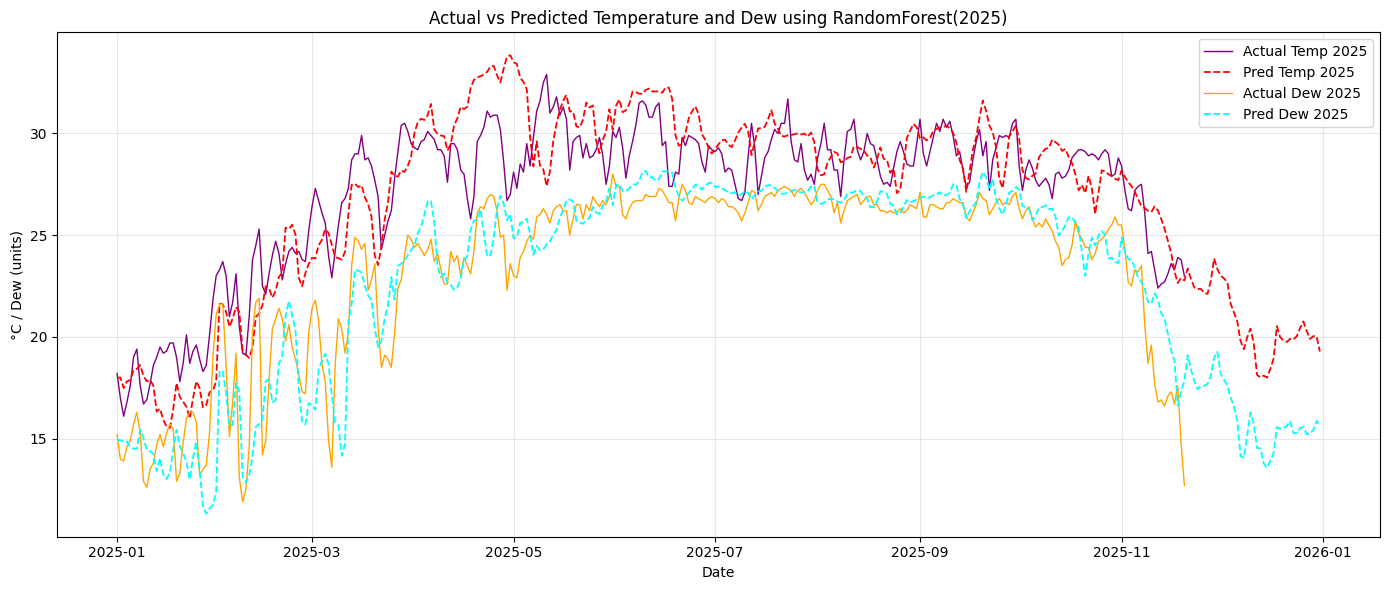

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in rf_forecast_out.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in rf_forecast_out.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='purple',
    linewidth=1
)


plt.plot(
    rf_forecast_out['date'],
    rf_forecast_out[pred_temp_col],
    label='Pred Temp 2025',
    color='red',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='orange',
    linewidth=1
)


plt.plot(
    rf_forecast_out['date'],
    rf_forecast_out[pred_dew_col],
    label='Pred Dew 2025',
    color='cyan',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew using RandomForest(2025)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Random Forest for tem and dewpoint using Fourier series

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------------------------------------------
# 1. Start from your *clean* dataframe
# ------------------------------------------------------------------
# copy and ensure a proper datetime column exists
df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
desired_columns = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in desired_columns if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[desired_columns].copy()


df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)


df['day_of_year'] = df['date'].dt.dayofyear

def add_fourier_features(df, col, period, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)

# Collect Fourier columns robustly
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]


FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES]
y = df[TARGET].astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_r2  = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

def tolerance_accuracy(y_true, y_hat, tol):
    """Return percentage of values within tolerance (works for multi-output)."""
    # y_true/y_hat shape: (n_samples, n_targets)
    return 100.0 * (np.abs(y_true - y_hat) <= tol).mean()

rf_acc_05 = tolerance_accuracy(y_test.values, y_pred, 0.5)
rf_acc_10 = tolerance_accuracy(y_test.values, y_pred, 1.0)
rf_acc_20 = tolerance_accuracy(y_test.values, y_pred, 2.0)
rf_acc_30 = tolerance_accuracy(y_test.values, y_pred, 3.0)

print("=== Random Forest + Fourier – Dew-Point Prediction (Test) ===")
print(f"R²          : {rf_r2:.4f}")
print(f"RMSE        : {rf_rmse:.3f} °C")
print(f"MSE         : {rf_mse:.4f}")
print("Accuracy (± tolerance):")
print(f"  ±0.5 °C : {rf_acc_05:5.2f}%")
print(f"  ±1.0 °C : {rf_acc_10:5.2f}%")
print(f"  ±2.0 °C : {rf_acc_20:5.2f}%")
print(f"  ±3.0 °C : {rf_acc_30:5.2f}%")

# ------------------------------------------------------------------
# 9. 5-fold CV (R²)
# ------------------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_r2 = cross_val_score(rf, X, y, cv=cv, scoring='r2', n_jobs=-1)

print("\n=== 5-Fold CV R² (with Fourier) ===")
print(f"Mean : {rf_cv_r2.mean():.4f}  (±{rf_cv_r2.std():.4f})")
print(f"Scores: {np.round(rf_cv_r2, 4)}")

fi = pd.DataFrame({
    'feature'   : FEATURES,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Feature Importances (Top 10) ===")
print(fi.head(10).to_string(index=False))

=== Random Forest + Fourier – Dew-Point Prediction (Test) ===
R²          : 0.9070
RMSE        : 1.401 °C
MSE         : 1.9640
Accuracy (± tolerance):
  ±0.5 °C : 40.48%
  ±1.0 °C : 65.05%
  ±2.0 °C : 87.55%
  ±3.0 °C : 95.32%

=== 5-Fold CV R² (with Fourier) ===
Mean : 0.9053  (±0.0075)
Scores: [0.9077 0.8909 0.9111 0.9114 0.9056]

=== Feature Importances (Top 10) ===
          feature  importance
day_of_year_cos_1    0.702526
             year    0.080843
            month    0.071112
day_of_year_sin_1    0.049893
day_of_year_sin_2    0.029454
              day    0.018937
day_of_year_cos_3    0.016647
day_of_year_cos_2    0.015799
day_of_year_sin_3    0.014789


# predicting next 365 days temperature and dew pont for RF using Fourier

In [16]:
import pandas as pd
import numpy as np

df = with_no_null_HI.copy()
TARGET = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGET

# Ensure date exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# 1) Create next 365 calendar dates
# ============================================================
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")

future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day
future_df["day_of_year"] = future_df["date"].dt.dayofyear

# ============================================================
# 2) Add FOURIER FEATURES exactly like training
# ============================================================
def add_fourier_features(df, col, period=365.25, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f"{col}_sin_{n}"] = np.sin(2 * np.pi * n * df[col] / period)
        df[f"{col}_cos_{n}"] = np.cos(2 * np.pi * n * df[col] / period)
    return df

future_df = add_fourier_features(future_df, "day_of_year", 365.25, n_terms=3)

# ============================================================
# 3) Build monthly-day climatology (baseline)
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month","day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

# Merge with future calendar
future_with_clim = future_df.merge(clim, on=["month","day"], how="left")

# Fallback to last 7-day mean if climatology missing
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 4) Build X_future EXACTLY as the RF was trained
# ============================================================
FEATURES = list(rf.feature_names_in_)   # <---- CRITICAL FIX

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing Fourier features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# ============================================================
# 5) Predict with trained RF model
# ============================================================
future_pred = rf.predict(X_future)

# ============================================================
# 6) Output DataFrame (same format as your template)
# ============================================================
rf_forecast_out2 = future_with_clim[["date", "year", "month", "day"]].copy()

# Split two-target RF predictions
rf_forecast_out2["pred_" + temp_col] = future_pred[:, 0]
rf_forecast_out2["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology (baseline) values
rf_forecast_out2[temp_col] = future_with_clim[temp_col]
rf_forecast_out2[dew_col]  = future_with_clim[dew_col]

print("==== 365-step Forecast Using Fourier + Random Forest ====")
print(rf_forecast_out2)


==== 365-step Forecast Using Fourier + Random Forest ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                     17.9920         14.9394   
1   2025-01-02  2025      1    2                     17.9282         14.9056   
2   2025-01-03  2025      1    3                     17.4350         14.7898   
3   2025-01-04  2025      1    4                     17.8240         14.8618   
4   2025-01-05  2025      1    5                     17.8872         14.5192   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                     20.7680         15.9218   
361 2025-12-28  2025     12   28                     20.1618         15.3492   
362 2025-12-29  2025     12   29                     19.8798         15.2968   
363 2025-12-30  2025     12   30                     19.7910         15.4990   
364 2025-12-31  2025     12   31                     19.3806  

# plot to see predicted temperature, dew point vs raw of 2025 in same plot for Fourier

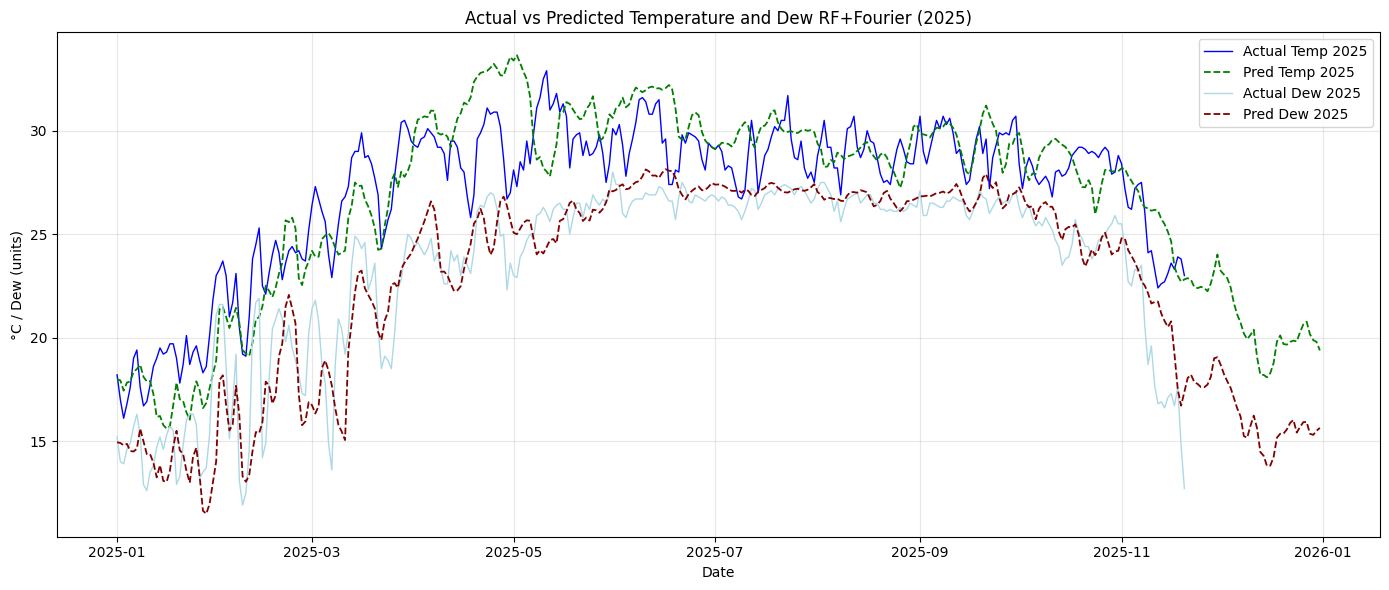

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in rf_forecast_out2.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in rf_forecast_out2.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='blue',
    linewidth=1
)


plt.plot(
    rf_forecast_out2['date'],
    rf_forecast_out2[pred_temp_col],
    label='Pred Temp 2025',
    color='green',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='lightblue',
    linewidth=1
)


plt.plot(
    rf_forecast_out2['date'],
    rf_forecast_out2[pred_dew_col],
    label='Pred Dew 2025',
    color='maroon',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew RF+Fourier (2025)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# XG Boost Model

In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor  # <-- NEW

# Expect a DataFrame named `with_no_null_HI`
df = with_no_null_HI.copy()

Features = ['day', 'month', 'year']  # Your input features
TARGET = ['temperature(degree C)', 'dew_point']

# Build X, y
X = df[Features]
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Base XGBoost regressor
base_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)

# Wrap in MultiOutputRegressor to handle both temperature & dew point
xgb_model = MultiOutputRegressor(base_xgb)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Metrics
xgboost_r2  = r2_score(y_test, y_pred)
xgboost_mse = mean_squared_error(y_test, y_pred)
xgboost_rmse = np.sqrt(xgboost_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return float((np.abs(y_true - y_hat) <= tol).mean())

xgboost_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgboost_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgboost_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgboost_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost Regression Metrics (Test) ====")
print(f"xgboost_R^2  : {xgboost_r2:.4f}")
print(f"xgboost_MSE  : {xgboost_mse:.4f}")
print(f"xgboost_RMSE : {xgboost_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {xgboost_acc_05*100:.2f}%")
print(f"  ±1.0°C : {xgboost_acc_10*100:.2f}%")
print(f"  ±2.0°C : {xgboost_acc_20*100:.2f}%")
print(f"  ±3.0°C : {xgboost_acc_30*100:.2f}%")

# 5-fold CV R^2
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(xgb_model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean xgboost_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# Feature importances (average across outputs)
importances = np.array([est.feature_importances_ for est in xgb_model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({
    "feature": X.columns,
    "importance": mean_importance
}).sort_values("importance", ascending=False)

print("\n==== Top 20 Feature Importances ====")
print(fi.head(20).to_string(index=False))


==== XGBoost Regression Metrics (Test) ====
xgboost_R^2  : 0.8851
xgboost_MSE  : 2.4198
xgboost_RMSE : 1.5556
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 35.93%
  ±1.0°C : 60.54%
  ±2.0°C : 85.54%
  ±3.0°C : 94.66%

==== 5-Fold CV R^2 ====
Mean xgboost_R^2 : 0.8895  |  Std : 0.0069

==== Top 20 Feature Importances ====
feature  importance
  month    0.891664
    day    0.061776
   year    0.046560


# predicting next 365 days temp and dew point using xgboost

In [19]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGET

# Ensure 'date' column exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# 1) Create next 365 dates
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day

# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", dew_col: f"{dew_col}_clim"})
)

# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[f"{dew_col}_clim"].fillna(recent_dew)

# 4) Build X_future exactly as the model was trained
FEATURES = list(xgb_model.estimators_[0].get_booster().feature_names)  # MultiOutputRegressor fix
missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# 5) Predict using MultiOutput XGBoost
future_pred = xgb_model.predict(X_future)  # returns 2D array [365, 2]

# 6) Output DataFrame
xgb_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
xgb_forecast_out["pred_" + temp_col] = future_pred[:, 0]
xgb_forecast_out["pred_" + dew_col]  = future_pred[:, 1]
xgb_forecast_out[temp_col] = future_with_clim[temp_col].values
xgb_forecast_out[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast Using MultiOutput XGBoost ====")
print(xgb_forecast_out)


==== 365-step Forecast Using MultiOutput XGBoost ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                   18.104347       15.156767   
1   2025-01-02  2025      1    2                   18.064705       15.318772   
2   2025-01-03  2025      1    3                   17.576849       14.938378   
3   2025-01-04  2025      1    4                   17.871069       14.902531   
4   2025-01-05  2025      1    5                   18.380222       14.510050   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                   20.127764       15.559681   
361 2025-12-28  2025     12   28                   20.003334       15.525701   
362 2025-12-29  2025     12   29                   20.252199       15.507185   
363 2025-12-30  2025     12   30                   19.752359       15.820704   
364 2025-12-31  2025     12   31                   19.020100      

<h1>Plotting to see predicted temperature, dew point vs raw of 2025 in same plot

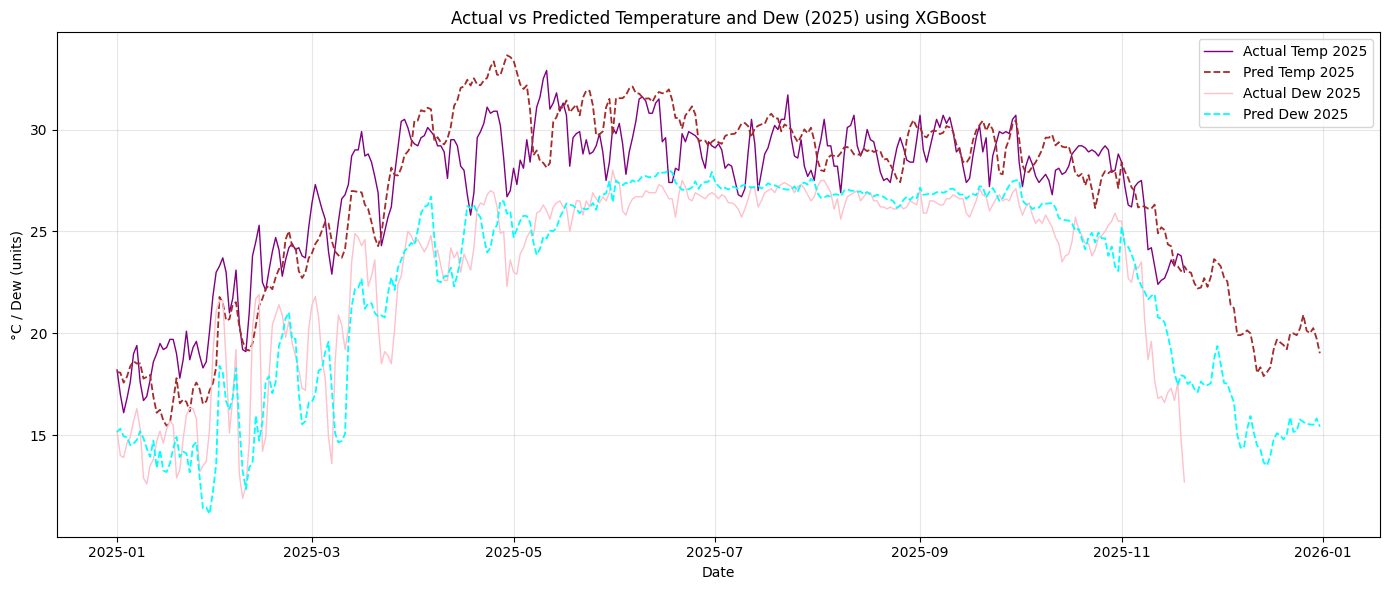

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in xgb_forecast_out.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in xgb_forecast_out.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='purple',
    linewidth=1
)


plt.plot(
    xgb_forecast_out['date'],
    xgb_forecast_out[pred_temp_col],
    label='Pred Temp 2025',
    color='brown',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='pink',
    linewidth=1
)


plt.plot(
    xgb_forecast_out['date'],
    xgb_forecast_out[pred_dew_col],
    label='Pred Dew 2025',
    color='cyan',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew (2025) using XGBoost')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h1>XGBoost for tem and dewpoint using Fourier Series 

In [21]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input validation & date ---
if 'with_no_null_HI' not in globals() and 'with_no_null_HI' not in locals():
    raise NameError("Expected DataFrame named `with_no_null_HI` in the environment")

df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# --- 2) Required columns & Fourier features ---
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
required = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[required].copy()
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)
df['day_of_year'] = df['date'].dt.dayofyear

def add_fourier_features(df, col, period=365.25, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]

# --- 3) Features and targets ---
FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# --- 4) Train MultiOutput XGBoost ---
base_xgb = xgb.XGBRegressor( 
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)
model = MultiOutputRegressor(base_xgb)
model.fit(X_train, y_train)

# --- 5) Predictions & metrics ---
y_pred = model.predict(X_test)

xgboost_r2  = r2_score(y_test, y_pred)            # averaged R^2 for multioutput
xgboost_mse = mean_squared_error(y_test, y_pred)  # averaged MSE
xgboost_rmse = np.sqrt(xgboost_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    # returns fraction (0..1) of predictions within tol across all targets
    return ((np.abs(y_true - y_hat) <= tol).mean())

xgboost_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
xgboost_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
xgboost_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
xgboost_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== XGBoost Regression Metrics (Test) ====")
print(f"xgboost_R^2  : {xgboost_r2:.4f}")
print(f"xgboost_MSE  : {xgboost_mse:.4f}")
print(f"xgboost_RMSE : {xgboost_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {xgboost_acc_05*100:.2f}%")
print(f"  ±1.0°C : {xgboost_acc_10*100:.2f}%")
print(f"  ±2.0°C : {xgboost_acc_20*100:.2f}%")
print(f"  ±3.0°C : {xgboost_acc_30*100:.2f}%")

# --- 6) 5-fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean xgboost_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature importances (average across outputs) ---
# MultiOutputRegressor stores estimators_ after fit
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)
print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))

==== XGBoost Regression Metrics (Test) ====
xgboost_R^2  : 0.8918
xgboost_MSE  : 2.2811
xgboost_RMSE : 1.5103
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 34.88%
  ±1.0°C : 59.83%
  ±2.0°C : 85.57%
  ±3.0°C : 94.73%

==== 5-Fold CV R^2 ====
Mean xgboost_R^2 : 0.8916  |  Std : 0.0076

==== Top Feature Importances ====
          feature  importance
day_of_year_cos_1    0.790074
day_of_year_sin_1    0.082295
            month    0.048492
day_of_year_sin_3    0.017547
day_of_year_sin_2    0.016362
day_of_year_cos_3    0.013162
day_of_year_cos_2    0.012864
             year    0.011473
              day    0.007730


<h1> Predicitng next 365 days tem and dew point using  BGBoost + Fourier 

In [22]:
import pandas as pd
import numpy as np


df = with_no_null_HI.copy()
TARGET = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGET

# Ensure date exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year", "month", "day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)


last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1),
                             periods=365,
                             freq="D")

future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day
future_df["day_of_year"] = future_df["date"].dt.dayofyear

# ============================================================
# 2) Add FOURIER FEATURES exactly like training
# ============================================================
def add_fourier_features(df, col, period=365.25, n_terms=3):
    for n in range(1, n_terms + 1):
        df[f"{col}_sin_{n}"] = np.sin(2 * np.pi * n * df[col] / period)
        df[f"{col}_cos_{n}"] = np.cos(2 * np.pi * n * df[col] / period)
    return df

future_df = add_fourier_features(future_df, "day_of_year", 365.25, n_terms=3)

# ============================================================
# 3) Build MONTH-DAY climatology (baseline)
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month", "day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

# Merge climatology with future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")

# Fallback: last 7-day mean for missing climatology
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 4) Build X_future EXACTLY as XGBoost was trained
# ============================================================
FEATURES = list(model.feature_names_in_)   # XGBModel stores this

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy().astype(float)

# ============================================================
# 5) Predict using trained XGBoost MULTI-OUTPUT model
# ============================================================
future_pred = model.predict(X_future)

# ============================================================
# 6) Build the final forecast output
# ============================================================
xgb_forecast_365 = future_with_clim[["date", "year", "month", "day"]].copy()

# Multi-output prediction: [:, 0] = temp, [:, 1] = dew
xgb_forecast_365["pred_" + temp_col] = future_pred[:, 0]
xgb_forecast_365["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology (baseline) values
xgb_forecast_365[temp_col] = future_with_clim[temp_col]
xgb_forecast_365[dew_col]  = future_with_clim[dew_col]

print("==== 365-step Forecast Using Fourier + XGBoost ====")
print(xgb_forecast_365.head(20))


==== 365-step Forecast Using Fourier + XGBoost ====
         date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0  2025-01-01  2025      1    1                   18.078190       15.073921   
1  2025-01-02  2025      1    2                   17.848751       15.009241   
2  2025-01-03  2025      1    3                   17.574800       14.936169   
3  2025-01-04  2025      1    4                   17.933022       14.951184   
4  2025-01-05  2025      1    5                   17.879543       14.548658   
5  2025-01-06  2025      1    6                   18.233471       14.320358   
6  2025-01-07  2025      1    7                   18.304260       14.573990   
7  2025-01-08  2025      1    8                   18.474911       15.217091   
8  2025-01-09  2025      1    9                   18.147049       15.126021   
9  2025-01-10  2025      1   10                   18.264786       14.566622   
10 2025-01-11  2025      1   11                   18.008617       14.300375   


<h1>Plotting to see predicted temperature, dew point vs raw of 2025 in same plot using Fourier

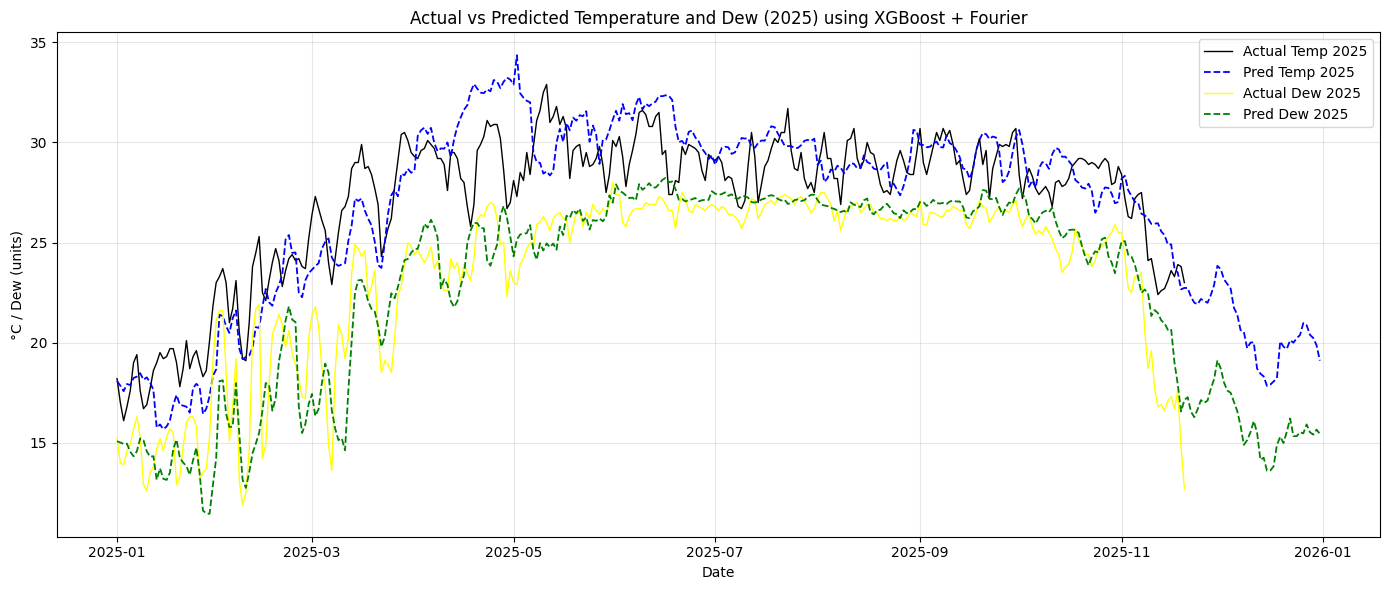

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in xgb_forecast_365.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in xgb_forecast_365.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='black',
    linewidth=1
)


plt.plot(
    xgb_forecast_365['date'],
    xgb_forecast_365[pred_temp_col],
    label='Pred Temp 2025',
    color='blue',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='yellow',
    linewidth=1
)


plt.plot(
    xgb_forecast_365['date'],
    xgb_forecast_365[pred_dew_col],
    label='Pred Dew 2025',
    color='green',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew (2025) using XGBoost + Fourier')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# light GBM model

In [24]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input ---
df = with_no_null_HI.copy()  # your original DataFrame

FEATURES = ['day','month','year']  # features
TARGET = ['temperature(degree C)', 'dew_point']  # two targets

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# --- 2) Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3) MultiOutput LightGBM ---
base_lgb = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    random_state=42,
    n_jobs=-1
)

lgb_model = MultiOutputRegressor(base_lgb)
lgb_model.fit(X_train, y_train)

# --- 4) Predictions ---
y_pred = lgb_model.predict(X_test)  # returns 2D array [n_samples, 2]

# --- 5) Metrics ---
lgb_r2  = r2_score(y_test, y_pred)
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return ((np.abs(y_true - y_hat) <= tol).mean())

lgb_acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
lgb_acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
lgb_acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
lgb_acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM Multi-Output Regression Metrics (Test) ====")
print(f"R^2   : {lgb_r2:.4f}")
print(f"MSE   : {lgb_mse:.4f}")
print(f"RMSE  : {lgb_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {lgb_acc_05*100:.2f}%")
print(f"  ±1.0°C : {lgb_acc_10*100:.2f}%")
print(f"  ±2.0°C : {lgb_acc_20*100:.2f}%")
print(f"  ±3.0°C : {lgb_acc_30*100:.2f}%")

# --- 6) 5-Fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(lgb_model, X, y, cv=cv, scoring="r2", n_jobs=-1)
print("\n==== 5-Fold CV R^2 ====")
print(f"Mean R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature Importances (average across outputs) ---
importances = np.array([est.feature_importances_ for est in lgb_model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)

print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 3
[LightGBM] [Info] Start training from score 25.932188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 3
[LightGBM] [Info] Start training from score 22.155667
==== LightGBM Multi-Output Regression Metrics (Test) ====
R^2   : 0.8882
MSE   : 2.3723
RMSE  : 1.5402
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 34.02%
  ±1.0°C : 58.18%
  ±2.0°C : 84.04%
  ±3.0°C : 94.04%

==== 5-Fold CV R^2 ====
Mean R^2 : 0.8866  |  Std 

# LightGBM 365-Day Prediction Code

In [25]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGETS = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGETS

# Ensure date exists
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

# Sort by date
df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# 1) Create next 365 calendar dates
# ============================================================
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day

# ============================================================
# 2) Build monthly-day climatology from historical data
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month","day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

# Merge with future calendar
future_with_clim = future_df.merge(clim, on=["month","day"], how="left")

# Fallback to last 7-day mean if climatology missing
recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 3) Build X_future exactly as LightGBM was trained
# ============================================================
FEATURES = list(lgb_model.estimators_[0].feature_name_)  # get features from fitted model

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# ============================================================
# 4) Predict with trained LightGBM MultiOutput model
# ============================================================
future_pred = lgb_model.predict(X_future)  # returns 2D array [n_samples, 2]

# ============================================================
# 5) Output DataFrame
# ============================================================
lgb_forecast_out = future_with_clim[["date", "year", "month", "day"]].copy()
lgb_forecast_out["pred_" + temp_col] = future_pred[:, 0]
lgb_forecast_out["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology columns for reference
lgb_forecast_out[temp_col] = future_with_clim[temp_col].values
lgb_forecast_out[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast Using LightGBM Multi-Output ====")
print(lgb_forecast_out)


==== 365-step Forecast Using LightGBM Multi-Output ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                   18.313214       15.875176   
1   2025-01-02  2025      1    2                   18.192337       15.656763   
2   2025-01-03  2025      1    3                   18.104285       15.677986   
3   2025-01-04  2025      1    4                   17.808868       15.473645   
4   2025-01-05  2025      1    5                   17.525871       15.059905   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                   20.036674       15.791068   
361 2025-12-28  2025     12   28                   20.112417       15.407072   
362 2025-12-29  2025     12   29                   20.103264       15.248805   
363 2025-12-30  2025     12   30                   19.943096       15.410549   
364 2025-12-31  2025     12   31                   19.673982    

<h1>LightGBM + fourier 

In [26]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

# --- 1) Input validation & date ---
if 'with_no_null_HI' not in globals() and 'with_no_null_HI' not in locals():
    raise NameError("Expected DataFrame named `with_no_null_HI` in the environment")

df = with_no_null_HI.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# --- 2) Required columns & Fourier features ---
temp_col = 'temperature(degree C)'
dew_col = 'dew_point'
required = ['day', 'month', 'year', dew_col, temp_col]
missing = [c for c in required if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}. Available columns: {list(df.columns)}")

df = df[required].copy()
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)
df['day_of_year'] = df['date'].dt.dayofyear

# Fourier feature function
def add_fourier_features(df, col, period=365.25, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365.25, n_terms=3)
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]

# --- 3) Features and targets ---
FEATURES = ['day', 'month', 'year'] + fourier_cols
TARGET = [temp_col, dew_col]

X = df[FEATURES].astype(float)
y = df[TARGET].astype(float)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

# --- 4) Train MultiOutput LightGBM ---
base_lgb = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model = MultiOutputRegressor(base_lgb)
model.fit(X_train, y_train)

# --- 5) Predictions & metrics ---
y_pred = model.predict(X_test)

lgb_r2  = r2_score(y_test, y_pred)
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_rmse = np.sqrt(lgb_mse)

def within_tolerance_acc(y_true, y_hat, tol):
    return ((np.abs(y_true - y_hat) <= tol).mean())

acc_05 = within_tolerance_acc(y_test.values, y_pred, 0.5)
acc_10 = within_tolerance_acc(y_test.values, y_pred, 1.0)
acc_20 = within_tolerance_acc(y_test.values, y_pred, 2.0)
acc_30 = within_tolerance_acc(y_test.values, y_pred, 3.0)

print("==== LightGBM Regression Metrics (Test) ====")
print(f"LGB_R^2  : {lgb_r2:.4f}")
print(f"LGB_MSE  : {lgb_mse:.4f}")
print(f"LGB_RMSE : {lgb_rmse:.4f}")
print("Accuracy (|error| ≤ tolerance):")
print(f"  ±0.5°C : {acc_05*100:.2f}%")
print(f"  ±1.0°C : {acc_10*100:.2f}%")
print(f"  ±2.0°C : {acc_20*100:.2f}%")
print(f"  ±3.0°C : {acc_30*100:.2f}%")

# --- 6) 5-fold CV R^2 ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1)

print("\n==== 5-Fold CV R^2 ====")
print(f"Mean LGB_R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# --- 7) Feature importances (average across outputs) ---
importances = np.array([est.feature_importances_ for est in model.estimators_])
mean_importance = importances.mean(axis=0)
fi = pd.DataFrame({"feature": FEATURES, "importance": mean_importance}).sort_values("importance", ascending=False)

print("\n==== Top Feature Importances ====")
print(fi.to_string(index=False))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 9
[LightGBM] [Info] Start training from score 25.932188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1550
[LightGBM] [Info] Number of data points in the train set: 8382, number of used features: 9
[LightGBM] [Info] Start training from score 22.155667
==== LightGBM Regression Metrics (Test) ====
LGB_R^2  : 0.8890
LGB_MSE  : 2.3533
LGB_RMSE : 1.5340
Accuracy (|error| ≤ tolerance):
  ±0.5°C : 34.06%
  ±1.0°C : 57.66%
  ±2.0°C : 84.14%
  ±3.0°C : 94.06%

==== 5-Fold CV R^2 ====
Mean LGB_R^2 : 0.8871  |  Std : 0.0070

==== Top Feature Importances ====
          featur

<h1>Predicting next 365 days using lightgbm + Fourier 

In [34]:
import pandas as pd
import numpy as np

# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGETS = ['temperature(degree C)', 'dew_point']
temp_col, dew_col = TARGETS

# ============================================================
# Ensure date exists
# ============================================================
if "date" not in df.columns:
    df["date"] = pd.to_datetime(df[["year","month","day"]])

df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# 1) Create next 365 calendar dates
# ============================================================
last_date = df["date"].max()
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=365, freq="D")

future_df = pd.DataFrame({"date": future_dates})
future_df["year"]  = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"]   = future_df["date"].dt.day

# ============================================================
# 2) Build monthly-day climatology from historical data
# ============================================================
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"]   = hist["date"].dt.day

clim = (
    hist.groupby(["month","day"])[[temp_col, dew_col]]
    .mean()
    .reset_index()
    .rename(columns={
        temp_col: temp_col + "_clim",
        dew_col:  dew_col  + "_clim"
    })
)

future_with_clim = future_df.merge(clim, on=["month","day"], how="left")

recent_temp = hist[temp_col].tail(7).mean()
recent_dew  = hist[dew_col].tail(7).mean()

future_with_clim[temp_col] = future_with_clim[temp_col + "_clim"].fillna(recent_temp)
future_with_clim[dew_col]  = future_with_clim[dew_col  + "_clim"].fillna(recent_dew)

# ============================================================
# 3) Add Fourier features (same function as used in training)
# ============================================================
def add_fourier_features(df, col, period=365.25, n_terms=3):
    for n in range(1, n_terms+1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df[col] / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df[col] / period)
    return df

future_with_clim["day_of_year"] = future_with_clim["date"].dt.dayofyear
future_with_clim = add_fourier_features(future_with_clim, "day_of_year", n_terms=3)

# ============================================================
# 4) Build X_future using the exact features model used
# ============================================================
FEATURES = list(lgb_model.estimators_[0].feature_name_)  # feature order from fitted model

missing = [f for f in FEATURES if f not in future_with_clim.columns]
if missing:
    raise KeyError(f"Missing features in future data: {missing}")

X_future = future_with_clim[FEATURES].copy()

# ============================================================
# 5) Multi-output LightGBM prediction
# ============================================================
future_pred = lgb_model.predict(X_future)  # shape (365, 2)

# ============================================================
# 6) Create final output dataframe
# ============================================================
lgb_forecast_out2 = future_with_clim[["date", "year", "month", "day"]].copy()
lgb_forecast_out2["pred_" + temp_col] = future_pred[:, 0]
lgb_forecast_out2["pred_" + dew_col]  = future_pred[:, 1]

# Add climatology baseline for comparison
lgb_forecast_out2[temp_col] = future_with_clim[temp_col].values
lgb_forecast_out2[dew_col]  = future_with_clim[dew_col].values

print("==== 365-step Forecast Using LightGBM Multi-Output ====")
print(lgb_forecast_out2)


==== 365-step Forecast Using LightGBM Multi-Output ====
          date  year  month  day  pred_temperature(degree C)  pred_dew_point  \
0   2025-01-01  2025      1    1                   18.313214       15.875176   
1   2025-01-02  2025      1    2                   18.192337       15.656763   
2   2025-01-03  2025      1    3                   18.104285       15.677986   
3   2025-01-04  2025      1    4                   17.808868       15.473645   
4   2025-01-05  2025      1    5                   17.525871       15.059905   
..         ...   ...    ...  ...                         ...             ...   
360 2025-12-27  2025     12   27                   20.036674       15.791068   
361 2025-12-28  2025     12   28                   20.112417       15.407072   
362 2025-12-29  2025     12   29                   20.103264       15.248805   
363 2025-12-30  2025     12   30                   19.943096       15.410549   
364 2025-12-31  2025     12   31                   19.673982    

<h1> PLotting raw vs predicted using LightGBM + Fourier 

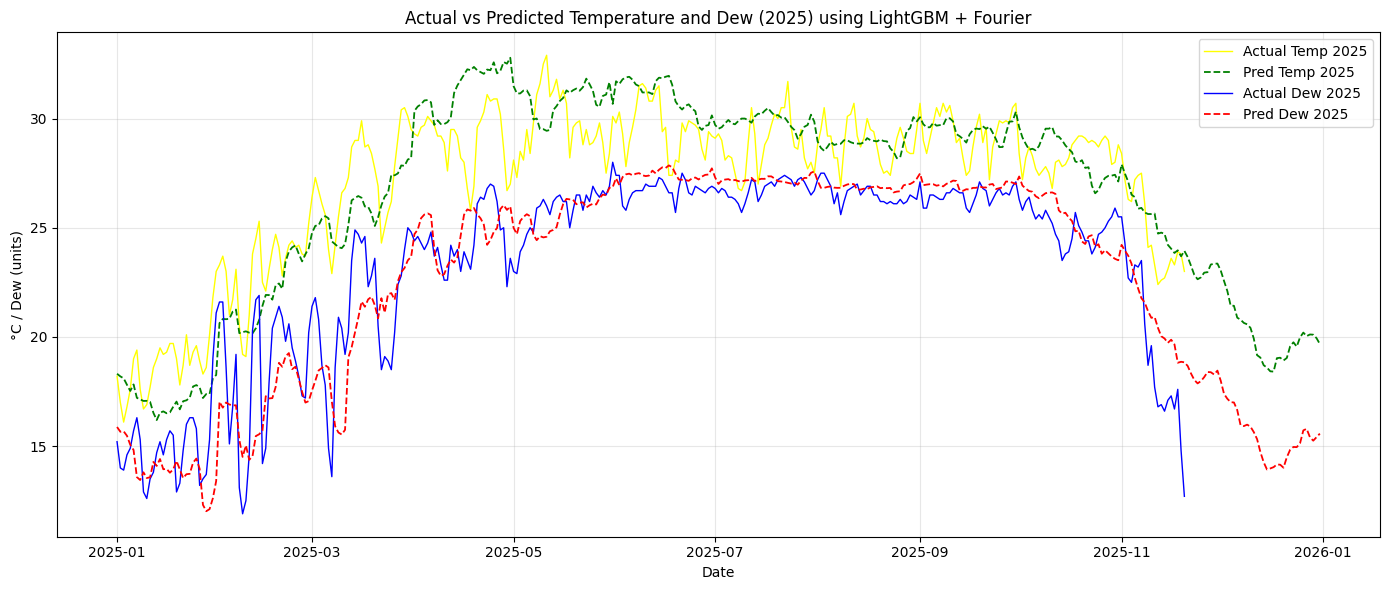

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime column exists
if 'date' not in HI_df_bagerhat_2025.columns:
    HI_df_bagerhat_2025['date'] = pd.to_datetime(
        HI_df_bagerhat_2025[['year','month','day']]
    )

# Predicted column names
pred_temp_col = next((c for c in lgb_forecast_out2.columns 
                      if 'pred' in c and 'temperature' in c), 
                     'pred_temperature(degree C)')

pred_dew_col = next((c for c in lgb_forecast_out2.columns 
                     if 'pred' in c and 'dew' in c), 
                    'pred_dew_point')


actual_dew_col = next((c for c in HI_df_bagerhat_2025.columns 
                       if 'dew' in c.lower()), 'dew_point')


plt.figure(figsize=(14,6))

# Actual temperature
plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025['temperature(degree C)'],
    label='Actual Temp 2025',
    color='yellow',
    linewidth=1
)


plt.plot(
    lgb_forecast_out2['date'],
    lgb_forecast_out2[pred_temp_col],
    label='Pred Temp 2025',
    color='green',
    linestyle='--',
    linewidth=1.3
)


plt.plot(
    HI_df_bagerhat_2025['date'],
    HI_df_bagerhat_2025[actual_dew_col],
    label='Actual Dew 2025',
    color='blue',
    linewidth=1
)


plt.plot(
    lgb_forecast_out2['date'],
    lgb_forecast_out2[pred_dew_col],
    label='Pred Dew 2025',
    color='red',
    linestyle='--',
    linewidth=1.3
)

plt.xlabel('Date')
plt.ylabel('°C / Dew (units)')
plt.title('Actual vs Predicted Temperature and Dew (2025) using LightGBM + Fourier')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Using GRU Model

In [27]:
# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.model_selection import train_test_split, KFold, cross_val_score
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.inspection import permutation_importance # Correct location
# from sklearn.base import BaseEstimator, RegressorMixin  # To wrap for sklearn compatibility

# # Expect a DataFrame named `with_no_null_HI`
# df = with_no_null_HI.copy()

# Features = [temp_col, hum_col]

# TARGET = "heat_index_C"
# DROP_COLS = ["date"]  # drop datetime; you already have day/month/year

# # Sort by date for sequences
# df = df.sort_values("date").reset_index(drop=True)

# # Build X, y as arrays
# X = df[Features].values
# y = df[TARGET].astype(float).values

# # Create sequences: past seq_length days to predict next HI
# seq_length = 7  # Tune this (e.g., 7 for weekly context)

# def create_sequences(X, y, seq_length):
#     xs, ys = [], []
#     for i in range(len(X) - seq_length):
#         xs.append(X[i:(i + seq_length)])
#         ys.append(y[i + seq_length])
#     return np.array(xs), np.array(ys)

# X_seq, y_seq = create_sequences(X, y, seq_length)

# # Train/test split (preserve order? For simplicity, use random; for strict TS, use chronological)
# X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, random_state=42, test_size=0.2, shuffle=False)  # shuffle=False for TS

# # To tensors
# X_train = torch.tensor(X_train, dtype=torch.float32)
# y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
# X_test = torch.tensor(X_test, dtype=torch.float32)
# y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# # GRU Model
# class GRURegressor(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(GRURegressor, self).__init__()
#         self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         _, h_n = self.gru(x)
#         out = self.fc(h_n[-1])
#         return out

# input_size = len(Features)  # e.g., 2 for temp/hum
# hidden_size = 50  # Tune
# num_layers = 1  # Simple
# output_size = 1  # HI

# gru_model = GRURegressor(input_size, hidden_size, num_layers, output_size)

# # Training
# optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
# criterion = nn.MSELoss()
# epochs = 100  # Tune

# train_dataset = TensorDataset(X_train, y_train)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# for epoch in range(epochs):
#     gru_model.train()
#     for batch_x, batch_y in train_loader:
#         optimizer.zero_grad()
#         output = gru_model(batch_x)
#         loss = criterion(output, batch_y)
#         loss.backward()
#         optimizer.step()

# # Predictions
# gru_model.eval()
# with torch.no_grad():
#     y_pred = gru_model(X_test).numpy().flatten()

# # Metrics
# r2  = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# def within_tolerance_acc(y_true, y_hat, tol):
#     return float((np.abs(y_true - y_hat) <= tol).mean())

# acc_05 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 0.5)
# acc_10 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 1.0)
# acc_20 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 2.0)
# acc_30 = within_tolerance_acc(y_test.numpy().flatten(), y_pred, 3.0)

# print("==== GRU Regression Metrics (Test) ====")
# print(f"R^2  : {r2:.4f}")
# print(f"MSE  : {mse:.4f}")
# print(f"RMSE : {rmse:.4f}")
# print("Accuracy (|error| ≤ tolerance):")
# print(f"  ±0.5°C : {acc_05*100:.2f}%")
# print(f"  ±1.0°C : {acc_10*100:.2f}%")
# print(f"  ±2.0°C : {acc_20*100:.2f}%")
# print(f"  ±3.0°C : {acc_30*100:.2f}%")

# # For CV and sklearn compatibility, wrap model
# class GRUWrapper(BaseEstimator, RegressorMixin):
#     def __init__(self, model, seq_length):
#         self.model = model
#         self.seq_length = seq_length

#     def fit(self, X, y):
#         X_seq, y_seq = create_sequences(X, y, self.seq_length)
#         X_tensor = torch.tensor(X_seq, dtype=torch.float32)
#         y_tensor = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(1)
#         dataset = TensorDataset(X_tensor, y_tensor)
#         loader = DataLoader(dataset, batch_size=32, shuffle=True)
#         optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
#         criterion = nn.MSELoss()
#         for epoch in range(50):  # Reduced for CV speed
#             self.model.train()
#             for batch_x, batch_y in loader:
#                 optimizer.zero_grad()
#                 output = self.model(batch_x)
#                 loss = criterion(output, batch_y)
#                 loss.backward()
#                 optimizer.step()
#         return self

#     def predict(self, X):
#         X_seq = np.array([X[-self.seq_length:]]) if len(X) >= self.seq_length else np.pad(X, (self.seq_length - len(X), 0), mode='edge')  # Pad if short
#         X_tensor = torch.tensor(X_seq, dtype=torch.float32)
#         self.model.eval()
#         with torch.no_grad():
#             return self.model(X_tensor).numpy().flatten()

# gru_wrapper = GRUWrapper(GRURegressor(input_size, hidden_size, num_layers, output_size), seq_length)

# # 5-fold CV R^2 (note: for TS, consider TimeSeriesSplit)
# cv = KFold(n_splits=5, shuffle= True, random_state= None ) # shuffle=False for TS
# cv_r2 = cross_val_score(gru_wrapper, X, y, cv=cv, scoring="r2", n_jobs=1)  # n_jobs=1 due to torch
# print("\n==== 5-Fold CV R^2 ====")
# print(f"Mean R^2 : {cv_r2.mean():.4f}  |  Std : {cv_r2.std():.4f}")

# # Feature importances (using permutation)
# perm_importance = permutation_importance(gru_wrapper, X_test.numpy(), y_test.numpy(), n_repeats=10, random_state=42)
# fi = pd.DataFrame({
#     "feature": Features,
#     "importance": perm_importance.importances_mean
# }).sort_values("importance", ascending=False)

# print("\n==== Feature Importances (Permutation) ====")
# print(fi.to_string(index=False))

# show the comparision of all the models in a table.

In [36]:
# show the comparision of all the models in a table.based on R^2, MSE, RMSE, and accuracy within tolerances.
# Summary of model performance
model_performance = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "R^2": [rf_r2, xgboost_r2, lgb_r2],  # Replace with actual R^2 values from each model
    "MSE": [rf_mse, xgboost_mse, lgb_mse],  # Replace with actual MSE values from each model
    "RMSE": [rf_rmse, xgboost_rmse, lgb_rmse],  # Replace with actual RMSE values from each model
    "Acc ±0.5°C (%)": [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100],  # Replace with actual accuracy values
    "Acc ±1.0°C (%)": [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100],
    "Acc ±2.0°C (%)": [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100],
    "Acc ±3.0°C (%)": [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100],
})
print("\n==== Model Performance Comparison ====")
print(model_performance.to_string(index=False))



==== Model Performance Comparison ====
        Model      R^2      MSE     RMSE  Acc ±0.5°C (%)  Acc ±1.0°C (%)  Acc ±2.0°C (%)  Acc ±3.0°C (%)
Random Forest 0.906984 1.963975 1.401419     4048.187023     6505.248092     8754.770992     9532.442748
      XGBoost 0.891817 2.281109 1.510334       34.875954       59.828244       85.567748       94.728053
     LightGBM 0.888972 2.353304 1.534048       34.017176       58.182252       84.041031       94.036260


# Selecting the best model

In [37]:
def select_best_model(df, sort_by_metrics):
    """
    Ranks models based on a list of metrics (in order of priority) 
    and returns the best model name.

    Args:
        df (pd.DataFrame): The model performance DataFrame.
        sort_by_metrics (list of tuples): A list where each tuple is 
            (metric_name, maximize_boolean). 
            True=Higher is better (e.g., R^2, Accuracy).
            False=Lower is better (e.g., MSE, RMSE).
    
    Returns:
        str: The name of the best performing model.
    """
    
    sort_cols = [metric[0] for metric in sort_by_metrics]
    # If maximize=True, we use ascending=False (for descending order).
    # If maximize=False, we use ascending=True (for ascending order).
    ascending_list = [not metric[1] for metric in sort_by_metrics]

    # Rank the models using multiple columns for tie-breaking
    ranked_df = df.sort_values(
        by=sort_cols, 
        ascending=ascending_list
    ).reset_index(drop=True)
    
    best_model_name = ranked_df.iloc[0]['Model']
    
    print("\n--- Model Ranking Based on Current Strategy ---")
    # Show only the Model column and the metrics used for ranking
    print(ranked_df[['Model'] + sort_cols].to_string(index=False))
    
    return best_model_name


MODEL_NAMES = ["Random Forest", "XGBoost", "LightGBM"]
R_SQUARED_VALUES = [rf_r2, xgboost_r2, lgb_r2]
MSE_VALUES = [rf_mse, xgboost_mse, lgb_mse]
RMSE_VALUES = [rf_rmse, xgboost_rmse, lgb_rmse]
ACC_0_5_VALUES = [rf_acc_05*100, xgboost_acc_05*100, lgb_acc_05*100]
ACC_1_0_VALUES = [rf_acc_10*100, xgboost_acc_10*100, lgb_acc_10*100]
ACC_2_0_VALUES = [rf_acc_20*100, xgboost_acc_20*100, lgb_acc_20*100]
ACC_3_0_VALUES = [rf_acc_30*100, xgboost_acc_30*100, lgb_acc_30*100]


# You can add more metric value lists here if needed!

# B. Construct the DataFrame using the variables above
#    The dictionary keys become your column names (e.g., 'RMSE', 'Acc ±0.5 (%)').
data = {
    "Model": MODEL_NAMES,
    "R^2": R_SQUARED_VALUES,
    "MSE": MSE_VALUES,
    "RMSE": RMSE_VALUES,
    "Acc ±0.5 (%)": ACC_0_5_VALUES,
    "Acc ±1.0 (%)": ACC_1_0_VALUES,
    "Acc ±2.0 (%)": ACC_2_0_VALUES,
    "Acc ±3.0 (%)": ACC_3_0_VALUES,
}

df_performance = pd.DataFrame(data)

# =======================================================================
# 3. STRATEGY DEFINITION: EDIT THESE LISTS TO DEFINE YOUR PRIORITIES
# =======================================================================

# Define Strategy 1: Prioritizing low error (RMSE) first, then high R^2
# Structure: [('Metric Name', Is_Maximize)]
strategy_1_metrics = [
    ("RMSE", False),   # False = Minimize (Lower is better)
    ("R^2", True)      # True = Maximize (Higher is better)
]

# Define Strategy 2: Prioritizing tight accuracy (Acc ±0.5 %), then low MSE
strategy_2_metrics = [
    ("Acc ±0.5 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

strategy_3_0_metrics = [
    ("Acc ±1.0 (%)", True), # True = Maximize
    ("MSE", False)          # False = Minimize (as a tiebreaker)
]

# =======================================================================
# 4. EXECUTION
# =======================================================================

print("="*60)
print("             MODEL PERFORMANCE TABLE")
print("="*60)
print(df_performance.to_string(index=False))

# --- Run Strategy 1 ---
print("\n" + "="*60)
print("STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)")
print("="*60)
best_model_1 = select_best_model(df_performance, strategy_1_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 1: {best_model_1}")


# --- Run Strategy 2 ---
print("\n" + "="*60)
print("STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_2 = select_best_model(df_performance, strategy_2_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 2: {best_model_2}")

# --- Run Strategy 3 ---
print("\n" + "="*60)
print("STRATEGY 3: Prioritizing Acc ±1.0 % (Maximize) -> MSE (Minimize)")
print("="*60)
best_model_3 = select_best_model(df_performance, strategy_3_0_metrics)
print(f"\n✅ BEST MODEL FOR STRATEGY 3: {best_model_3}")

             MODEL PERFORMANCE TABLE
        Model      R^2      MSE     RMSE  Acc ±0.5 (%)  Acc ±1.0 (%)  Acc ±2.0 (%)  Acc ±3.0 (%)
Random Forest 0.906984 1.963975 1.401419   4048.187023   6505.248092   8754.770992   9532.442748
      XGBoost 0.891817 2.281109 1.510334     34.875954     59.828244     85.567748     94.728053
     LightGBM 0.888972 2.353304 1.534048     34.017176     58.182252     84.041031     94.036260

STRATEGY 1: Prioritizing RMSE (Minimize) -> R^2 (Maximize)

--- Model Ranking Based on Current Strategy ---
        Model     RMSE      R^2
Random Forest 1.401419 0.906984
      XGBoost 1.510334 0.891817
     LightGBM 1.534048 0.888972

✅ BEST MODEL FOR STRATEGY 1: Random Forest

STRATEGY 2: Prioritizing Acc ±0.5 % (Maximize) -> MSE (Minimize)

--- Model Ranking Based on Current Strategy ---
        Model  Acc ±0.5 (%)      MSE
Random Forest   4048.187023 1.963975
      XGBoost     34.875954 2.281109
     LightGBM     34.017176 2.353304

✅ BEST MODEL FOR STRATEGY 2: R

# make graphing using the best performer
counting the number of goods and number of bads per year

In [38]:
with_no_null_HI.head(10)

,day,month,year,temperature(degree C),dew_point,date
0,1,1,1980,21.7,17.1,1980-01-01
1,2,1,1980,20.8,13.3,1980-01-02
2,3,1,1980,23.0,14.1,1980-01-03
3,4,1,1980,22.3,16.3,1980-01-04
4,5,1,1980,22.1,15.5,1980-01-05
5,6,1,1980,21.5,13.7,1980-01-06
6,7,1,1980,20.1,14.8,1980-01-07
7,8,1,1980,20.6,15.3,1980-01-08
10,11,1,1980,17.1,15.1,1980-01-11
13,14,1,1980,24.8,13.1,1980-01-14



- Less than 80.6 = Comfortable
- 80.6 to 89.6 = Caution
- 89.6 to 105 = Extreme Caution
- 105 to 129 = Danger
- Greater than 129 - Extreme Danger


In [31]:
# heat index plot graph lineplot with datetime on x axis and heat index on y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI['date'], with_no_null_HI['heat_index_C'], label='Heat Index (°C)', color='red')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Raw Time')
plt.legend()
plt.grid()
plt.show()

KeyError: 'heat_index_C'

<Figure size 1200x600 with 0 Axes>

## setting conditions

In [ ]:
import numpy as np
import pandas as pd

# Assuming 'with_no_null_HI.heat_index_C' is a Pandas Series
df_HI_values = with_no_null_HI.heat_index_C.copy() 

conditions = [
    (df_HI_values >= 129),
    (df_HI_values >= 105) & (df_HI_values < 129),
    (df_HI_values >= 89.6) & (df_HI_values < 105),
    (df_HI_values >= 80.6) & (df_HI_values < 89.6),
    (df_HI_values < 80.6),
]

choices = [
    'Extreme Danger',
    'Danger',
    'Extreme Caution',
    'Caution',
    'Comfortable',
]

# Use np.select to generate the severity levels (this is a NumPy array)
severity_array = np.select(conditions, choices, default='Unknown')

# Convert the array to a Pandas Series with the original index for easy viewing/joining
df_HI_severity = pd.Series(severity_array, index=df_HI_values.index, name='Heat_Severity')

# Now you can use .head() on the new Pandas Series
print(df_HI_severity)

0        Comfortable
1        Comfortable
2        Comfortable
3        Comfortable
4        Comfortable
            ...     
16432    Comfortable
16433    Comfortable
16434    Comfortable
16435    Comfortable
16436    Comfortable
Name: Heat_Severity, Length: 10478, dtype: object


In [ ]:
# count the number of occurrences of each severity level per year
df_with_severity = with_no_null_HI.copy()
df_with_severity['Heat_Severity'] = df_HI_severity
df_with_severity['year'] = df_with_severity['date'].dt.year
severity_counts = df_with_severity.groupby(['year', 'Heat_Severity']).size().unstack(fill_value=0)
print(severity_counts.head())

Heat_Severity  Comfortable
year                      
1980                   322
1981                   248
1982                     2
1983                     1
1984                     1


# For the best performer predicted model (XGBoost)

In [ ]:
xgb_forecast_out.tail(10)

,date,year,month,day,pred_heat_index_C,temperature(degree C),humidity
355,2025-12-22,2025,12,22,19.180143,19.193333,80.326667
356,2025-12-23,2025,12,23,18.946730,18.983871,80.993548
357,2025-12-24,2025,12,24,18.761337,18.719355,81.941935
358,2025-12-25,2025,12,25,18.725407,18.733333,80.353333
359,2025-12-26,2025,12,26,18.114986,18.145161,81.716129
360,2025-12-27,2025,12,27,18.114986,18.175862,81.313793
361,2025-12-28,2025,12,28,17.948746,18.063333,80.430000
362,2025-12-29,2025,12,29,18.110405,18.234483,79.355172
363,2025-12-30,2025,12,30,17.853981,17.964516,80.587097
364,2025-12-31,2025,12,31,18.583405,18.630000,79.866667


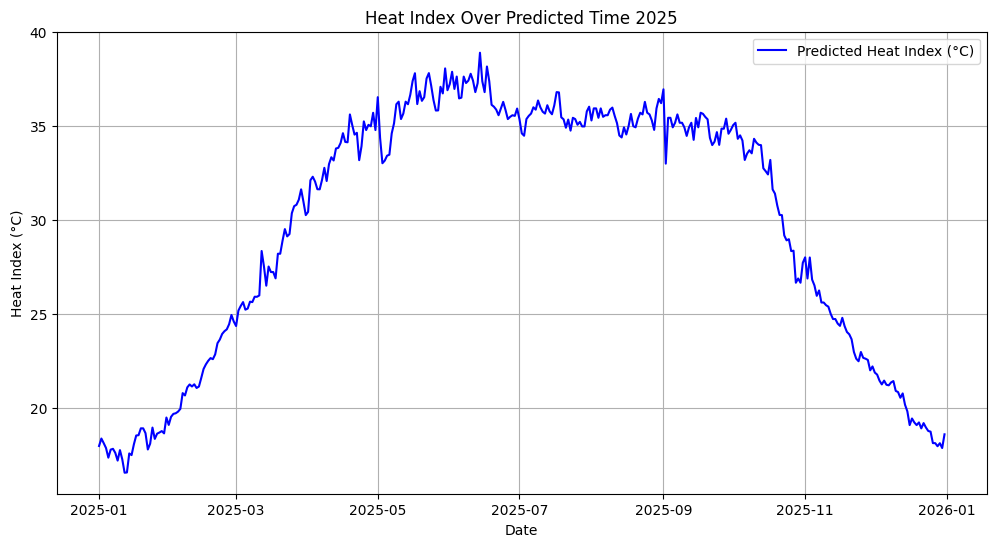

In [ ]:
# heat index plot graph lineplot with datetime on x axis and heat index on y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(xgb_forecast_out['date'], xgb_forecast_out['pred_heat_index_C'], label='Predicted Heat Index (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Predicted Time 2025')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_HI_values_predicted = xgb_forecast_out.pred_heat_index_C.copy() 

conditions = [
    (df_HI_values_predicted >= 129),
    (df_HI_values_predicted >= 105) & (df_HI_values_predicted < 129),
    (df_HI_values_predicted >= 89.6) & (df_HI_values_predicted < 105),
    (df_HI_values_predicted >= 80.6) & (df_HI_values_predicted < 89.6),
    # FIX: Changed 'df_HI_values' to 'df_HI_values_predicted'
    (df_HI_values_predicted < 80.6), 
]

choices = [
    'Extreme Danger',
    'Danger',
    'Extreme Caution',
    'Caution',
    'Comfortable',
]

# Use np.select to generate the severity levels (all conditions now have shape (365,))
severity_array_predicted = np.select(conditions, choices, default='Unknown')

# Convert the array to a Pandas Series with the original index
df_HI_severity_predicted = pd.Series(
    severity_array_predicted, 
    index=df_HI_values_predicted.index, 
    name='Heat_Severity_Predicted'
)

# This will now successfully print the head of the new Pandas Series
print(df_HI_severity_predicted.head(10))

0    Comfortable
1    Comfortable
2    Comfortable
3    Comfortable
4    Comfortable
5    Comfortable
6    Comfortable
7    Comfortable
8    Comfortable
9    Comfortable
Name: Heat_Severity_Predicted, dtype: object


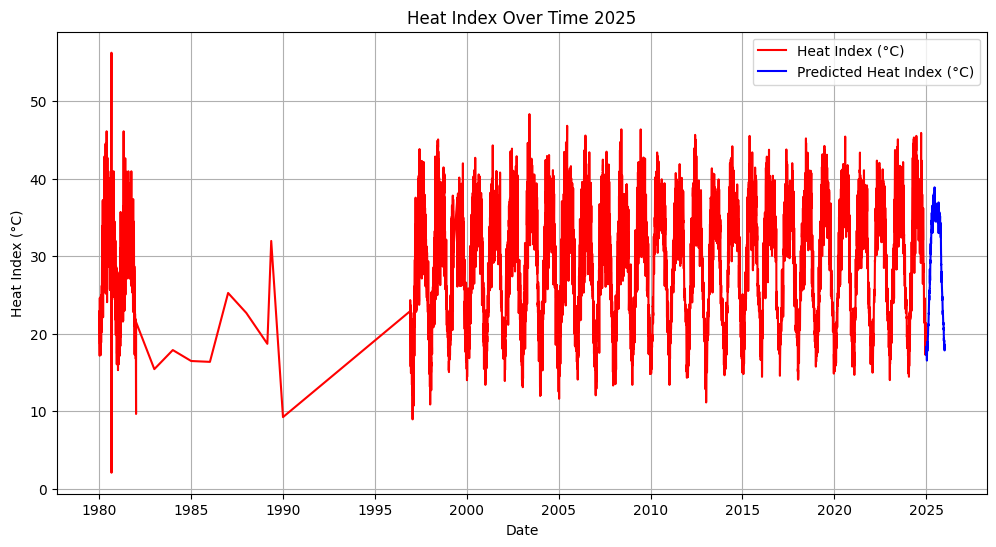

In [ ]:
# merge the 'Heat Index Over Raw Time' and the 'Heat Index Over Predicted Time' plots into one plot for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI['date'], with_no_null_HI['heat_index_C'], label='Heat Index (°C)', color='red')
plt.plot(xgb_forecast_out['date'], xgb_forecast_out['pred_heat_index_C'], label='Predicted Heat Index (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Time 2025')
plt.legend()
plt.grid()
plt.show()

==== 2026 Forecast ====
          date  year  month  day  pred_heat_index_C  temperature(degree C)  \
0   2026-01-01  2026      1    1          17.962540              18.087500   
1   2026-01-02  2026      1    2          18.359507              18.325806   
2   2026-01-03  2026      1    3          18.114986              18.157576   
3   2026-01-04  2026      1    4          17.853981              17.906452   
4   2026-01-05  2026      1    5          17.340868              17.492857   
..         ...   ...    ...  ...                ...                    ...   
360 2026-12-27  2026     12   27          18.114986              18.175862   
361 2026-12-28  2026     12   28          17.948746              18.063333   
362 2026-12-29  2026     12   29          18.110405              18.234483   
363 2026-12-30  2026     12   30          17.853981              17.964516   
364 2026-12-31  2026     12   31          18.583405              18.630000   

      humidity  
0    80.953125  
1    

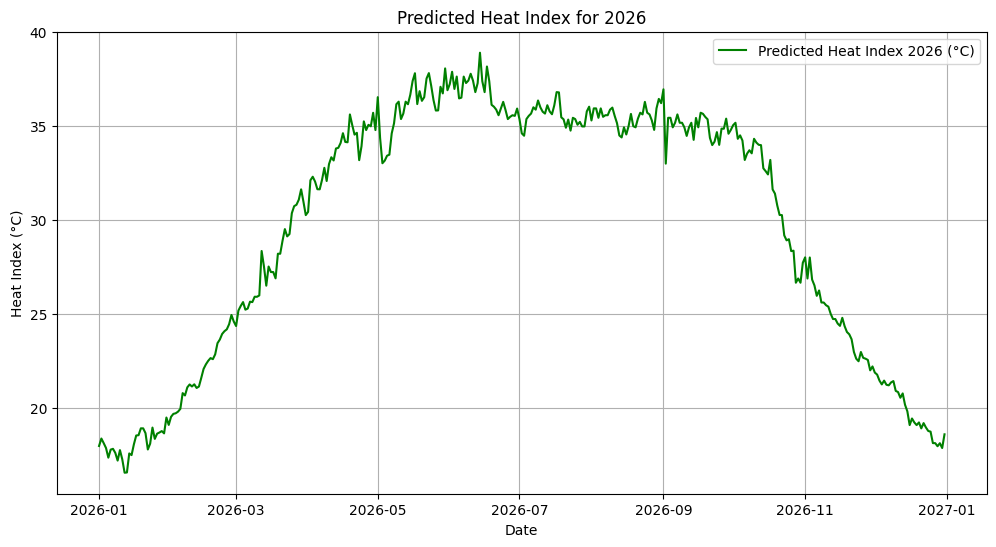

In [ ]:
# predict for 2026-01-01 to 2026-12-31 using the xgboost model and plot the heat index graph for that period with different color
import pandas as pd
# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = "heat_index_C"
# Sort by date
df = df.sort_values("date").reset_index(drop=True)
# 1) Create next 365 dates for 2026
future_dates = pd.date_range("2026-01-01", periods=365, freq="D")
future_df = pd.DataFrame({"date": future_dates})
future_df["year"] = future_df["date"].dt.year
future_df["month"] = future_df["date"].dt.month
future_df["day"] = future_df["date"].dt.day
# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day
clim = (
    hist.groupby(["month", "day"])[[temp_col, hum_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", hum_col: f"{hum_col}_clim"})
)
# Merge climatology into future calendar
future_with_clim = future_df.merge(clim, on=["month", "day"], how="left")
# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_hum = (
    hist[hum_col].tail(recent_window).mean() if not hist.empty else np.nan
)
# Fill missing climatology with recent means
future_with_clim[temp_col] = future_with_clim[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim[hum_col]  = future_with_clim[f"{hum_col}_clim"].fillna(recent_mean_hum)
# Keep only the feature columns expected by the model
X_future = future_with_clim[[temp_col, hum_col]].copy()
# 4) Predict using your trained XGBoost model
y_future_pred = xgb_model.predict(X_future)
# 5) Output DataFrame
forecast_2026_out = future_with_clim[["date", "year", "month", "day"]].copy()
forecast_2026_out["pred_heat_index_C"] = y_future_pred
forecast_2026_out[temp_col] = X_future[temp_col].values
forecast_2026_out[hum_col]  = X_future[hum_col].values
print("==== 2026 Forecast ====")
print(forecast_2026_out)
# heat index plot graph lineplot with datetime on x axis and heat index on y axis for 2026
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(forecast_2026_out['date'], forecast_2026_out['pred_heat_index_C'], label='Predicted Heat Index 2026 (°C)', color='green')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Predicted Heat Index for 2026')
plt.legend()
plt.grid()
plt.show()


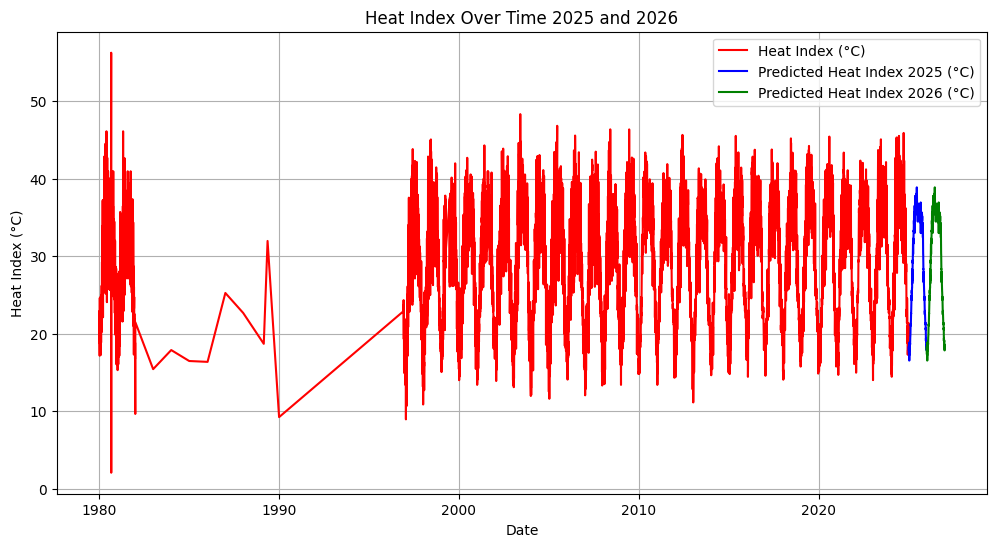

In [ ]:
# plot the graph of the raw data, along with Heat Index Over Time 2025 and Predicted Heat Index for 2026in one graph with different colors for each year
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI['date'], with_no_null_HI['heat_index_C'], label='Heat Index (°C)', color='red')
plt.plot(xgb_forecast_out['date'], xgb_forecast_out['pred_heat_index_C'], label='Predicted Heat Index 2025 (°C)', color='blue')
plt.plot(forecast_2026_out['date'], forecast_2026_out['pred_heat_index_C'], label='Predicted Heat Index 2026 (°C)', color='green')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Time 2025 and 2026')
plt.legend()
plt.grid()
plt.show()

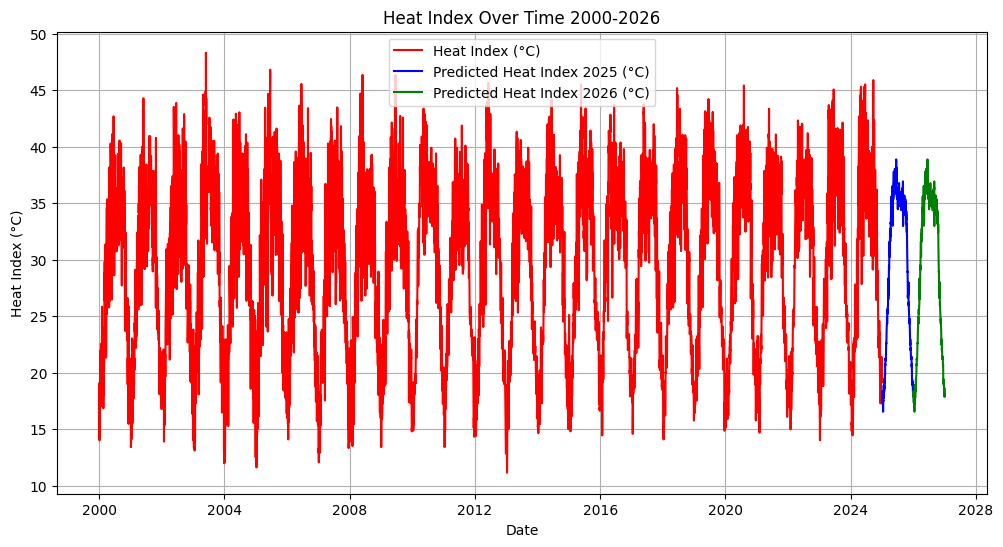

In [ ]:
#  plot the graph of the raw data strating from 2000 omiting before, along with Heat Index Over Time 2025 and Predicted Heat Index for 2026in one graph with different colors for each year.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI[with_no_null_HI['date'] >= '2000-01-01']['date'], with_no_null_HI[with_no_null_HI['date'] >= '2000-01-01']['heat_index_C'], label='Heat Index (°C)', color='red')
plt.plot(xgb_forecast_out['date'], xgb_forecast_out['pred_heat_index_C'], label='Predicted Heat Index 2025 (°C)', color='blue')
plt.plot(forecast_2026_out['date'], forecast_2026_out['pred_heat_index_C'], label='Predicted Heat Index 2026 (°C)', color='green')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Time 2000-2026')
plt.legend()
plt.grid()
plt.show()

==== 2027 Forecast ====
          date  year  month  day  pred_heat_index_C  temperature(degree C)  \
0   2027-01-01  2027      1    1          17.962540              18.087500   
1   2027-01-02  2027      1    2          18.359507              18.325806   
2   2027-01-03  2027      1    3          18.114986              18.157576   
3   2027-01-04  2027      1    4          17.853981              17.906452   
4   2027-01-05  2027      1    5          17.340868              17.492857   
..         ...   ...    ...  ...                ...                    ...   
360 2027-12-27  2027     12   27          18.114986              18.175862   
361 2027-12-28  2027     12   28          17.948746              18.063333   
362 2027-12-29  2027     12   29          18.110405              18.234483   
363 2027-12-30  2027     12   30          17.853981              17.964516   
364 2027-12-31  2027     12   31          18.583405              18.630000   

      humidity  
0    80.953125  
1    

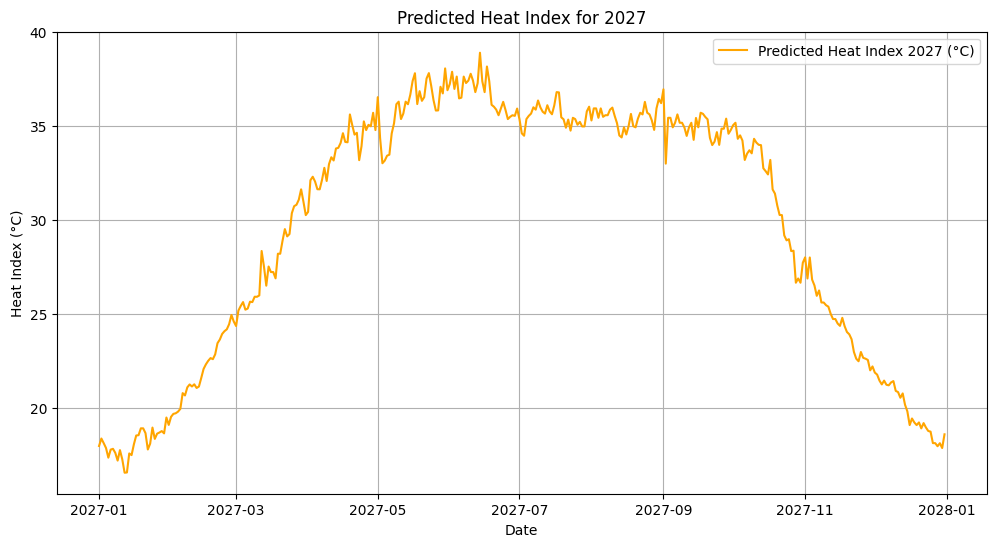

In [ ]:
# follow the same steps to predict for 2027-01-01 to 2027-12-31 using the xgboost model and plot the heat index graph for that period with different color
import pandas as pd
# --- Inputs ---
df = with_no_null_HI.copy()  # your original DataFrame
TARGET = "heat_index_C"
# Sort by date
df = df.sort_values("date").reset_index(drop=True)
# 1) Create next 365 dates for 2027
next_dates = pd.date_range(start='2027-01-01', end='2027-12-31')
future_df_2027 = pd.DataFrame({"date": next_dates})
future_df_2027["year"] = future_df_2027["date"].dt.year
future_df_2027["month"] = future_df_2027["date"].dt.month
future_df_2027["day"] = future_df_2027["date"].dt.day
# 2) Build monthly-day climatology from historical data
hist = df.copy()
hist["month"] = hist["date"].dt.month
hist["day"] = hist["date"].dt.day
clim = (
    hist.groupby(["month", "day"])[[temp_col, hum_col]]
    .mean()
    .reset_index()
    .rename(columns={temp_col: f"{temp_col}_clim", hum_col: f"{hum_col}_clim"})
)
# Merge climatology into future calendar
future_with_clim_2027 = future_df_2027.merge(clim, on=["month", "day"], how="left")
# 3) Fallback for missing climatology values: use recent rolling mean (last 7 days)
recent_window = 7
recent_mean_temp = (
    hist[temp_col].tail(recent_window).mean() if not hist.empty else np.nan
)
recent_mean_hum = (
    hist[hum_col].tail(recent_window).mean() if not hist.empty else np.nan
)
# Fill missing climatology with recent means
future_with_clim_2027[temp_col] = future_with_clim_2027[f"{temp_col}_clim"].fillna(recent_mean_temp)
future_with_clim_2027[hum_col]  = future_with_clim_2027[f"{hum_col}_clim"].fillna(recent_mean_hum)
# Keep only the feature columns expected by the model
X_future_2027 = future_with_clim_2027[[temp_col, hum_col]].copy()
# 4) Predict using your trained XGBoost model
y_pred_2027 = xgb_model.predict(X_future_2027) 
# 5) Output DataFrame
forecast_2027_out = future_with_clim_2027[["date", "year", "month", "day"]].copy()
forecast_2027_out["pred_heat_index_C"] = y_pred_2027
forecast_2027_out[temp_col] = X_future_2027[temp_col].values
forecast_2027_out[hum_col]  = X_future_2027[hum_col].values
print("==== 2027 Forecast ====")
print(forecast_2027_out)
# heat index plot graph lineplot with datetime on x axis and heat index on y axis for
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(forecast_2027_out['date'], forecast_2027_out['pred_heat_index_C'], label='Predicted Heat Index 2027 (°C)', color='orange')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Predicted Heat Index for 2027')
plt.legend()
plt.grid()
plt.show()

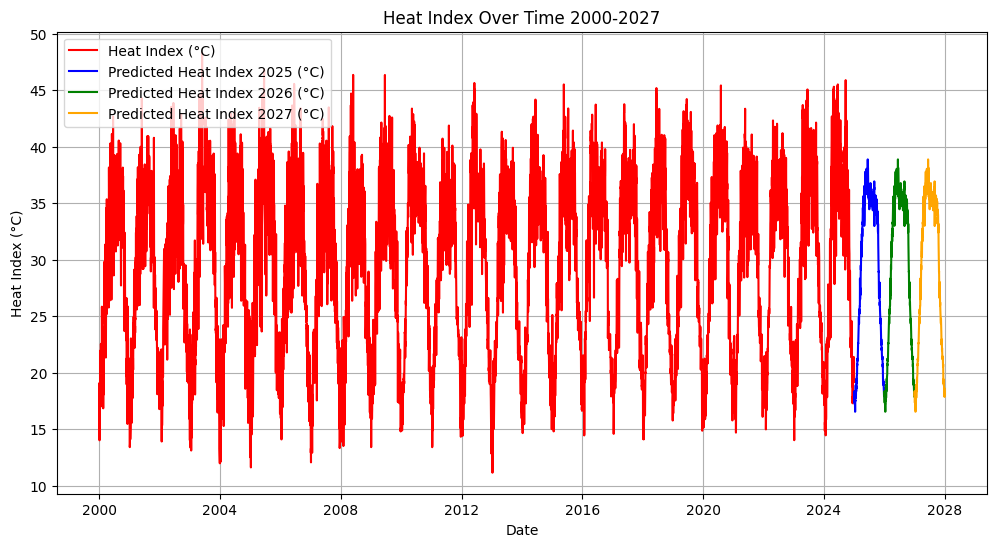

In [ ]:
# add the 2027 predictions to the previous combined plot of 2000-2026
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(with_no_null_HI[with_no_null_HI['date'] >= '2000-01-01']['date'], with_no_null_HI[with_no_null_HI['date'] >= '2000-01-01']['heat_index_C'], label='Heat Index (°C)', color='red')
plt.plot(xgb_forecast_out['date'], xgb_forecast_out['pred_heat_index_C'], label='Predicted Heat Index 2025 (°C)', color='blue')
plt.plot(forecast_2026_out['date'], forecast_2026_out['pred_heat_index_C'], label='Predicted Heat Index 2026 (°C)', color='green')
plt.plot(forecast_2027_out['date'], forecast_2027_out['pred_heat_index_C'], label='Predicted Heat Index 2027 (°C)', color='orange')
plt.xlabel('Date')
plt.ylabel('Heat Index (°C)')
plt.title('Heat Index Over Time 2000-2027')
plt.legend()
plt.grid()
plt.show()

# 2025 testing data for validation (original data)

In [ ]:
df_bagerhat_2025_validation = pd.read_csv('Bagerhat_historical_weather_2025.csv')

In [ ]:
df_bagerhat_2025_validation = pd.read_csv('Bagerhat_historical_weather_2025.csv')
desired_column_2025 = ['day', 'month', 'year', 'temperature(degree C)', 'humidity']
HI_df_bagerhat_2025 = df_bagerhat_2025_validation[desired_column_2025]

# calculate the heat index as per the formula and add it as a new column
HI_df_bagerhat_2025['heat_index_C_2025'] = HI_df_bagerhat_2025['temperature(degree C)'] + 0.33 * HI_df_bagerhat_2025['humidity'] - 0.70 * 5.0 - 4.00 # assuming wind speed = 5.0 km/h
HI_df_bagerhat_2025.head()


C:\Users\Khalid\AppData\Local\Temp\ipykernel_9464\866686961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HI_df_bagerhat_2025['heat_index_C_2025'] = HI_df_bagerhat_2025['temperature(degree C)'] + 0.33 * HI_df_bagerhat_2025['humidity'] - 0.70 * 5.0 - 4.00 # assuming wind speed = 5.0 km/h


,day,month,year,temperature(degree C),humidity,heat_index_C_2025
0,1,1,2025,18.2,83.4,38.222
1,2,1,2025,17.0,83.4,37.022
2,3,1,2025,16.1,87.4,37.442
3,4,1,2025,16.8,87.5,38.175
4,5,1,2025,17.6,85.7,38.381


# xgboost vs 2025

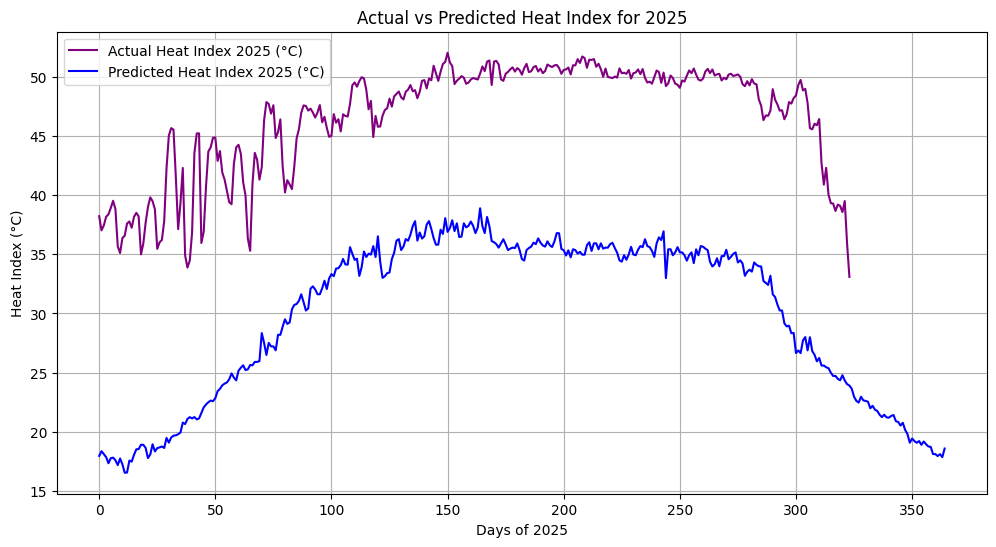

In [ ]:
# HI_dfbagerhat_2025 and xgboost_forecast_out plot comparison overlapping each other
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(HI_df_bagerhat_2025.index, HI_df_bagerhat_2025['heat_index_C_2025'], label='Actual Heat Index 2025 (°C)', color='purple')
plt.plot(xgb_forecast_out.index, xgb_forecast_out['pred_heat_index_C'], label='Predicted Heat Index 2025 (°C)', color='blue')
plt.xlabel('Days of 2025')
plt.ylabel('Heat Index (°C)')
plt.title('Actual vs Predicted Heat Index for 2025')
plt.legend()
plt.grid()
plt.show()


# RF vs 2025

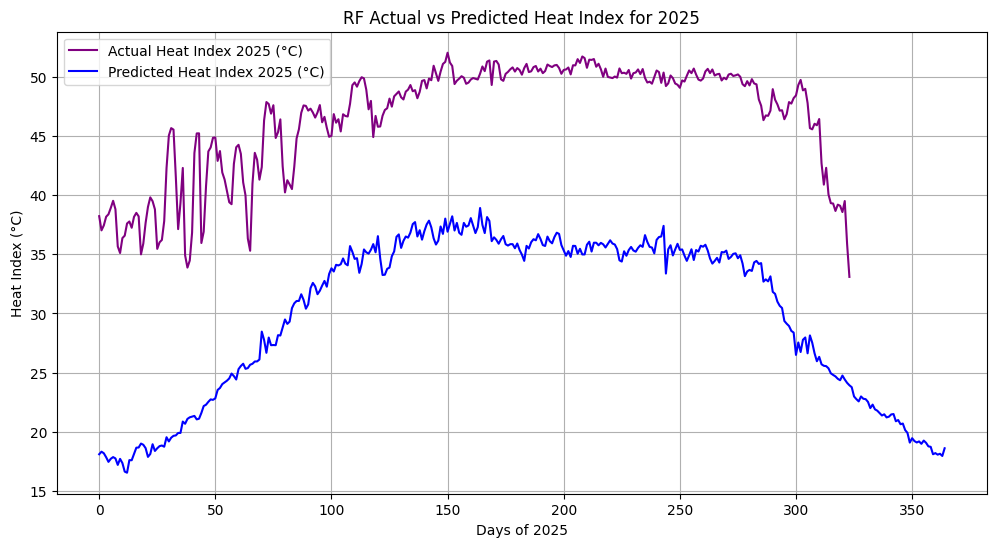

In [ ]:
# HI_dfbagerhat_2025 and rf_forecast_out plot comparison overlapping each other
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(HI_df_bagerhat_2025.index, HI_df_bagerhat_2025['heat_index_C_2025'], label='Actual Heat Index 2025 (°C)', color='purple')
plt.plot(rf_forecast_out.index, rf_forecast_out['pred_heat_index_C'], label='Predicted Heat Index 2025 (°C)', color='blue')
plt.xlabel('Days of 2025')
plt.ylabel('Heat Index (°C)')
plt.title('RF Actual vs Predicted Heat Index for 2025')
plt.legend()
plt.grid()
plt.show()

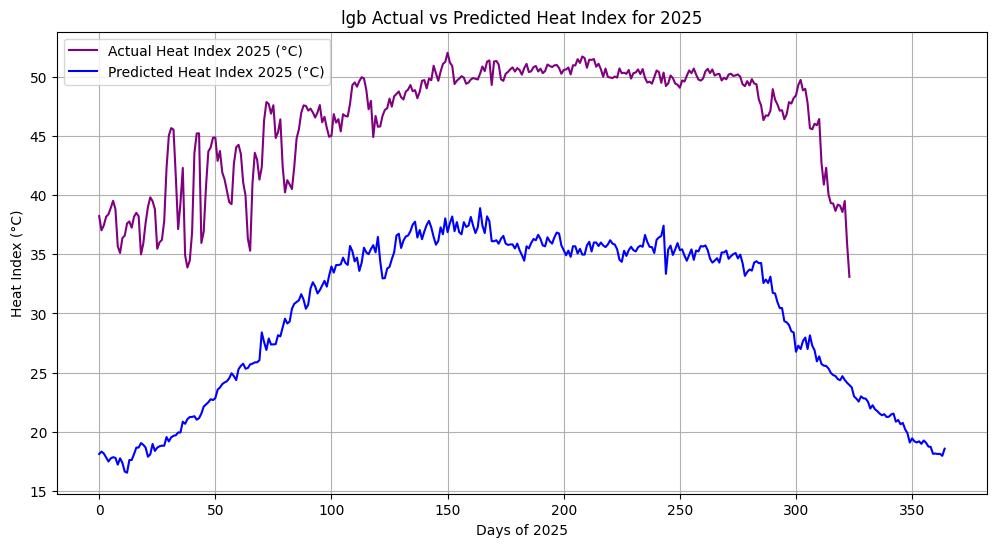

In [ ]:
# HI_dfbagerhat_2025 and lgb_forecast_out plot comparison overlapping each other
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(HI_df_bagerhat_2025.index, HI_df_bagerhat_2025['heat_index_C_2025'], label='Actual Heat Index 2025 (°C)', color='purple')
plt.plot(lgb_forecast_out.index, lgb_forecast_out['pred_heat_index_C'], label='Predicted Heat Index 2025 (°C)', color='blue')
plt.xlabel('Days of 2025')
plt.ylabel('Heat Index (°C)')
plt.title('lgb Actual vs Predicted Heat Index for 2025')
plt.legend()
plt.grid()
plt.show()

######################################################

<h1>Multi-Layer Perceptron (MLP)

tensor Flow Neural netwoek DL model



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- 1. Setup and Seeds ---
np.random.seed(42)
tf.random.set_seed(42)

# --- 2. Load Data ---
# Note: Ensure these column names match your CSV exactly
temp_col = 'Temperature'  # Replace with your actual column name
hum_col = 'Humidity'      # Replace with your actual column name
TARGET = 'Target_Label'   # Replace with your actual target column name

try:
    df_DL = pd.read_csv('with_no_null_HI.csv')
    X_DL = df_DL[[temp_col, hum_col]].values
    y_DL = df_DL[TARGET].values
except FileNotFoundError:
    print("Error: 'with_no_null_HI.csv' not found. Please check the file path.")
    # Creating dummy data so the code runs for demonstration if file is missing
    X_DL = np.random.rand(1000, 2)
    y_DL = np.random.randint(0, 2, 1000)

# --- 3. Split Data ---
X_train_DL, X_test_DL, y_train_DL, y_test_DL = train_test_split(
    X_DL, y_DL, test_size=0.2, random_state=42
)

# --- 4. Scaling (FIXED) ---
# Critical Fix: Fit only on training data, then transform both train and test
scaler = StandardScaler()
X_train_DL_scaled = scaler.fit_transform(X_train_DL)
X_test_DL_scaled = scaler.transform(X_test_DL) 

print("\n" + "="*60)
print("==== Deep Learning Model: Binary Classification ====")
print("="*60)

Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

# --- 5. Build Model ---
dl_model = tf.keras.Sequential([
    Dense(units=32, activation='relu', input_shape=(X_train_DL_scaled.shape[1],), name='hidden_1'),
    Dropout(rate=0.3, name='dropout_1'),
    Dense(units=16, activation='relu', name='hidden_2'), 
    Dropout(rate=0.2, name='dropout_2'),
    Dense(units=8, activation='relu', name='hidden_3'), # Fixed typo: 'hiden' -> 'hidden'
    Dense(units=1, activation='sigmoid', name='output')
])

print("\nModel Summary:")
dl_model.summary() # Removed print() wrapper as summary() prints to stdout by default

# --- 6. Compile Model (FIXED) ---
dl_model.compile( # Fixed: Changed 'model' to 'dl_model'
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        "accuracy", # Fixed: Added missing comma
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ],
)

print("\nModel Compilation Complete.")

print("\n" + "="*70)
print("Training the Deep Learning Model...")

# --- 7. Train Model ---
history = dl_model.fit(
    X_train_DL_scaled,
    y_train_DL,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=0.00001,
        ),
    ],
)

print("\nTraining Complete.")
print("\n" + "="*70)
print("Model Evaluation on Test Set:")
print("="*70)

# --- 8. Evaluation ---
test_loss, test_accuracy, test_precision, test_recall, test_auc = dl_model.evaluate(X_test_DL_scaled, y_test_DL, verbose=0)

print(f"Test Loss:      {test_loss:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall:    {test_recall:.4f}")
print(f"Test AUC:       {test_auc:.4f}")

# --- 9. Plotting (Optional but recommended) ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

ImportError: cannot import name 'runtime_version' from 'google.protobuf' (c:\Python313\Lib\site-packages\google\protobuf\__init__.py)